In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import os
import sys

In [3]:
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_VISIBLE_DEVICES=2


In [4]:
%env MIX6_DATASETS=/runai-ivrl-scratch/students/2021-fall-sp-jellouli/mix6

env: MIX6_DATASETS=/runai-ivrl-scratch/students/2021-fall-sp-jellouli/mix6


In [5]:
sys.path.append(os.path.normpath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.normpath(os.path.join(os.getcwd(), '..', 'external', 'MiDaS')))

In [6]:
from src.depth.midas_hkrm import MidasHKRMNet
from src.objects.features import GeneralizedRCNNObjectDetector

In [7]:
from detectron2.evaluation import COCOEvaluator
from detectron2.data import MetadataCatalog
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog, build_detection_test_loader, DatasetMapper
from detectron2.evaluation import inference_on_dataset
import torch

from src.utils.objects_utils import get_hkrm_model, construct_config
import src.objects
from detectron2.modeling import build_model
from src.datasets import HRWSI, ApolloScape, RedWeb
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from src.utils import midas_train_transform, midas_test_transform
from src.depth import MidasHKRMNet

In [8]:
cfg = construct_config()
cfg.MODEL.WEIGHTS = '/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output/model_final.pth'

In [9]:
detector = GeneralizedRCNNObjectDetector(cfg)

In [ ]:
model = MidasHKRMNet(detector, 10, device='cuda')

Using cache found in /runai-ivrl-scratch/students/2021-fall-sp-jellouli/.cache/torch/hub/facebookresearch_WSL-Images_main


In [8]:
hrwsi = HRWSI()

In [9]:
img, label = hrwsi[0]

In [12]:
from torch.utils.data import DataLoader

In [37]:
loader = DataLoader(range(10), batch_size=5, collate_fn = lambda x:x, shuffle=True)

In [38]:
loader_iter = iter(loader)

In [39]:
for _ in range(2):
    for i, x in enumerate(loader, 0):
        print(x)

[6, 9, 2, 8, 5]
[0, 4, 7, 1, 3]
[8, 5, 9, 6, 7]
[3, 1, 4, 0, 2]


In [19]:
next(loader_iter)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [41]:
def cycle(loader):
    cycling_iterator = iter(loader)
    while True:
        try:
            item = next(cycling_iterator)
            yield item
        except StopIteration:
            cycling_iterator = iter(loader)
            yield next(cycling_iterator)

In [42]:
cycle_loader = cycle(loader)

In [43]:
for i in cycle_loader:
    print(i)

[2, 9, 5, 3, 1]
[4, 6, 8, 7, 0]
[4, 9, 1, 5, 2]
[8, 3, 6, 0, 7]
[5, 6, 4, 7, 3]
[2, 0, 8, 1, 9]
[4, 3, 9, 8, 5]
[0, 1, 6, 7, 2]
[0, 8, 3, 7, 6]
[5, 9, 2, 4, 1]
[4, 9, 0, 1, 2]
[8, 3, 5, 7, 6]
[0, 8, 6, 9, 2]
[1, 4, 3, 7, 5]
[3, 9, 0, 5, 8]
[1, 2, 7, 6, 4]
[9, 3, 4, 0, 2]
[1, 5, 8, 7, 6]
[6, 0, 4, 9, 2]
[7, 3, 1, 8, 5]
[6, 3, 8, 5, 1]
[9, 2, 4, 0, 7]
[6, 8, 5, 7, 9]
[0, 1, 2, 3, 4]
[5, 8, 2, 6, 9]
[4, 3, 7, 0, 1]
[8, 0, 6, 1, 5]
[3, 2, 9, 7, 4]
[9, 7, 6, 5, 2]
[1, 3, 4, 8, 0]
[8, 0, 6, 1, 3]
[9, 4, 2, 5, 7]
[9, 2, 8, 6, 5]
[7, 3, 1, 0, 4]
[1, 5, 0, 2, 9]
[6, 3, 4, 7, 8]
[8, 0, 1, 2, 9]
[6, 7, 4, 3, 5]
[3, 9, 4, 0, 7]
[6, 8, 5, 2, 1]
[3, 5, 7, 8, 0]
[9, 2, 1, 4, 6]
[8, 4, 9, 6, 1]
[2, 0, 5, 3, 7]
[5, 0, 4, 3, 7]
[2, 6, 8, 1, 9]
[9, 6, 3, 8, 4]
[5, 0, 2, 7, 1]
[9, 0, 8, 3, 1]
[6, 5, 4, 2, 7]
[3, 5, 8, 4, 2]
[7, 9, 1, 0, 6]
[7, 0, 3, 1, 5]
[9, 4, 6, 8, 2]
[5, 3, 4, 8, 2]
[6, 1, 0, 9, 7]
[8, 5, 3, 0, 6]
[1, 2, 4, 7, 9]
[8, 7, 2, 0, 4]
[6, 1, 9, 5, 3]
[4, 6, 7, 9, 3]
[8, 2, 1, 5, 0]
[3, 5, 7

[8, 2, 0, 1, 6]
[5, 6, 7, 4, 0]
[9, 8, 1, 2, 3]
[4, 5, 2, 8, 0]
[6, 1, 3, 9, 7]
[3, 4, 8, 7, 2]
[6, 1, 9, 0, 5]
[9, 3, 2, 8, 6]
[4, 7, 1, 0, 5]
[8, 2, 1, 0, 6]
[7, 5, 4, 9, 3]
[6, 2, 9, 5, 7]
[1, 4, 8, 0, 3]
[9, 1, 7, 0, 2]
[3, 4, 5, 8, 6]
[6, 4, 0, 8, 9]
[7, 3, 2, 1, 5]
[8, 6, 1, 5, 7]
[0, 9, 3, 4, 2]
[2, 0, 5, 1, 4]
[8, 9, 7, 6, 3]
[6, 1, 5, 9, 4]
[0, 3, 7, 8, 2]
[7, 8, 5, 4, 3]
[0, 9, 1, 2, 6]
[2, 7, 9, 0, 5]
[4, 1, 6, 3, 8]
[1, 7, 4, 9, 0]
[8, 6, 2, 5, 3]
[6, 4, 8, 3, 0]
[1, 5, 2, 9, 7]
[9, 5, 3, 1, 7]
[8, 4, 6, 2, 0]
[6, 1, 7, 4, 2]
[3, 9, 8, 0, 5]
[5, 2, 4, 8, 7]
[1, 6, 0, 3, 9]
[1, 6, 4, 0, 3]
[9, 7, 5, 8, 2]
[4, 6, 1, 3, 5]
[2, 9, 8, 7, 0]
[4, 3, 6, 2, 8]
[5, 0, 9, 7, 1]
[2, 4, 7, 5, 3]
[9, 8, 0, 6, 1]
[7, 6, 8, 9, 3]
[5, 4, 0, 2, 1]
[9, 6, 5, 3, 7]
[4, 1, 0, 8, 2]
[7, 8, 3, 1, 9]
[4, 6, 0, 5, 2]
[0, 6, 5, 8, 1]
[4, 2, 3, 9, 7]
[0, 9, 2, 6, 4]
[3, 1, 8, 5, 7]
[4, 6, 5, 7, 0]
[3, 1, 9, 8, 2]
[7, 5, 8, 2, 1]
[6, 9, 3, 4, 0]
[7, 2, 5, 8, 9]
[4, 6, 1, 3, 0]
[6, 7, 0, 9, 2]
[8, 5, 1

[4, 5, 0, 1, 6]
[7, 9, 3, 8, 2]
[1, 8, 7, 4, 6]
[2, 5, 0, 3, 9]
[6, 1, 5, 8, 3]
[7, 9, 2, 0, 4]
[9, 3, 2, 6, 8]
[0, 4, 5, 7, 1]
[8, 9, 5, 1, 4]
[6, 3, 0, 7, 2]
[8, 9, 2, 3, 6]
[1, 0, 5, 4, 7]
[9, 8, 6, 3, 2]
[7, 4, 5, 0, 1]
[0, 7, 2, 6, 3]
[9, 4, 8, 5, 1]
[0, 3, 9, 2, 7]
[6, 4, 5, 8, 1]
[5, 9, 8, 0, 7]
[6, 1, 2, 3, 4]
[9, 7, 2, 5, 1]
[8, 3, 0, 6, 4]
[5, 7, 2, 1, 9]
[8, 4, 3, 0, 6]
[4, 2, 0, 8, 5]
[9, 6, 1, 7, 3]
[6, 4, 0, 8, 1]
[7, 5, 3, 9, 2]
[5, 4, 1, 7, 8]
[0, 3, 6, 9, 2]
[7, 9, 3, 8, 0]
[4, 2, 6, 1, 5]
[4, 6, 5, 3, 1]
[2, 8, 9, 0, 7]
[2, 9, 7, 3, 1]
[6, 8, 0, 4, 5]
[9, 2, 1, 8, 6]
[3, 0, 4, 5, 7]
[9, 1, 2, 7, 5]
[8, 6, 3, 0, 4]
[7, 3, 5, 0, 8]
[2, 4, 9, 6, 1]
[7, 0, 4, 5, 1]
[6, 3, 2, 8, 9]
[9, 1, 8, 3, 5]
[7, 0, 2, 4, 6]
[0, 1, 4, 8, 7]
[2, 9, 5, 3, 6]
[2, 6, 8, 3, 7]
[1, 9, 4, 0, 5]
[3, 0, 8, 2, 9]
[6, 7, 5, 1, 4]
[4, 5, 7, 3, 6]
[8, 2, 1, 0, 9]
[1, 6, 3, 8, 4]
[9, 0, 7, 2, 5]
[2, 8, 1, 6, 4]
[9, 3, 7, 5, 0]
[9, 2, 0, 6, 8]
[1, 7, 5, 4, 3]
[0, 7, 9, 8, 2]
[3, 6, 4, 1, 5]
[0, 3, 1

[2, 4, 7, 5, 3]
[1, 8, 9, 6, 0]
[7, 6, 1, 5, 2]
[0, 8, 9, 3, 4]
[5, 0, 3, 7, 2]
[8, 6, 4, 1, 9]
[6, 8, 7, 5, 2]
[9, 4, 3, 0, 1]
[3, 7, 8, 6, 4]
[2, 0, 9, 5, 1]
[2, 5, 7, 3, 6]
[4, 8, 9, 0, 1]
[3, 8, 2, 5, 4]
[0, 6, 7, 1, 9]
[0, 2, 1, 6, 3]
[5, 7, 8, 4, 9]
[6, 0, 2, 7, 8]
[1, 3, 5, 4, 9]
[6, 7, 3, 5, 9]
[8, 4, 1, 2, 0]
[6, 9, 7, 3, 8]
[5, 4, 0, 1, 2]
[4, 7, 8, 9, 2]
[0, 6, 5, 3, 1]
[6, 9, 1, 2, 3]
[4, 8, 0, 7, 5]
[5, 1, 8, 0, 2]
[9, 4, 6, 3, 7]
[7, 4, 8, 0, 5]
[6, 9, 2, 3, 1]
[3, 6, 1, 4, 5]
[0, 7, 8, 2, 9]
[3, 7, 0, 6, 8]
[5, 9, 1, 4, 2]
[6, 7, 1, 5, 4]
[2, 0, 8, 3, 9]
[4, 0, 3, 9, 2]
[8, 1, 5, 7, 6]
[4, 7, 3, 5, 8]
[0, 1, 2, 9, 6]
[8, 1, 2, 0, 7]
[4, 6, 9, 3, 5]
[8, 9, 0, 7, 3]
[1, 2, 6, 5, 4]
[1, 5, 7, 0, 8]
[6, 3, 9, 2, 4]
[5, 2, 3, 7, 0]
[1, 8, 9, 4, 6]
[6, 5, 1, 4, 9]
[7, 3, 0, 2, 8]
[5, 4, 0, 6, 1]
[8, 7, 3, 9, 2]
[5, 8, 7, 9, 3]
[0, 1, 6, 4, 2]
[8, 5, 9, 7, 0]
[3, 2, 4, 6, 1]
[6, 4, 1, 5, 3]
[8, 9, 2, 0, 7]
[3, 0, 9, 5, 1]
[2, 6, 8, 7, 4]
[8, 0, 6, 9, 2]
[7, 5, 1, 3, 4]
[9, 0, 3

[6, 9, 0, 1, 7]
[7, 3, 0, 1, 5]
[2, 8, 9, 6, 4]
[1, 5, 0, 8, 6]
[2, 9, 3, 4, 7]
[5, 8, 3, 7, 4]
[6, 2, 9, 0, 1]
[5, 7, 0, 8, 9]
[4, 2, 3, 1, 6]
[5, 7, 6, 1, 3]
[0, 8, 4, 2, 9]
[9, 6, 3, 2, 5]
[7, 0, 4, 1, 8]
[3, 7, 0, 4, 9]
[6, 2, 5, 8, 1]
[6, 3, 1, 5, 2]
[7, 8, 9, 4, 0]
[4, 6, 9, 0, 7]
[3, 5, 8, 2, 1]
[4, 9, 6, 7, 5]
[0, 8, 2, 3, 1]
[2, 1, 0, 8, 6]
[3, 9, 4, 7, 5]
[1, 0, 2, 3, 4]
[7, 8, 5, 9, 6]
[3, 6, 4, 9, 2]
[1, 7, 8, 0, 5]
[7, 9, 5, 6, 1]
[3, 8, 2, 4, 0]
[9, 5, 8, 3, 4]
[0, 2, 6, 1, 7]
[5, 0, 2, 7, 1]
[8, 4, 9, 6, 3]
[2, 6, 7, 1, 5]
[9, 3, 4, 8, 0]
[8, 5, 9, 4, 0]
[6, 2, 7, 1, 3]
[1, 4, 5, 9, 2]
[8, 7, 6, 0, 3]
[6, 8, 0, 4, 5]
[7, 2, 1, 9, 3]
[9, 0, 2, 5, 1]
[6, 7, 8, 4, 3]
[4, 8, 1, 7, 3]
[9, 6, 5, 2, 0]
[9, 1, 4, 6, 7]
[8, 0, 3, 2, 5]
[1, 7, 4, 0, 9]
[3, 6, 2, 8, 5]
[2, 3, 5, 1, 4]
[6, 9, 0, 8, 7]
[4, 7, 6, 1, 0]
[5, 8, 2, 3, 9]
[9, 6, 8, 5, 4]
[0, 2, 1, 3, 7]
[3, 7, 0, 4, 6]
[1, 8, 2, 9, 5]
[8, 2, 5, 4, 1]
[6, 7, 3, 0, 9]
[2, 9, 6, 5, 1]
[0, 7, 8, 4, 3]
[3, 1, 8, 6, 5]
[9, 4, 0

[2, 9, 5, 3, 4]
[0, 1, 7, 6, 8]
[5, 8, 0, 7, 6]
[9, 1, 2, 3, 4]
[5, 0, 1, 3, 8]
[2, 7, 4, 9, 6]
[1, 3, 8, 2, 6]
[4, 9, 5, 0, 7]
[6, 1, 9, 0, 2]
[3, 4, 5, 7, 8]
[5, 7, 3, 9, 2]
[1, 0, 4, 6, 8]
[0, 3, 8, 6, 2]
[4, 7, 5, 9, 1]
[0, 3, 1, 9, 6]
[4, 2, 8, 5, 7]
[4, 7, 8, 6, 1]
[0, 3, 5, 2, 9]
[1, 7, 2, 9, 0]
[4, 6, 3, 8, 5]
[0, 3, 5, 7, 1]
[4, 6, 8, 9, 2]
[5, 4, 9, 1, 7]
[2, 6, 8, 3, 0]
[8, 6, 1, 7, 2]
[4, 5, 3, 9, 0]
[4, 2, 8, 0, 3]
[1, 5, 7, 6, 9]
[9, 8, 4, 2, 5]
[7, 6, 1, 3, 0]
[0, 9, 8, 7, 1]
[6, 5, 3, 4, 2]
[6, 4, 9, 7, 0]
[2, 3, 8, 1, 5]
[3, 1, 8, 4, 7]
[2, 9, 0, 5, 6]
[5, 1, 7, 8, 3]
[0, 9, 6, 4, 2]
[9, 4, 2, 1, 0]
[6, 3, 5, 7, 8]
[1, 5, 8, 2, 3]
[4, 7, 9, 6, 0]
[6, 1, 3, 2, 8]
[4, 7, 9, 5, 0]
[6, 0, 8, 2, 3]
[5, 9, 7, 1, 4]
[3, 7, 5, 2, 4]
[8, 1, 0, 9, 6]
[1, 9, 4, 0, 6]
[2, 3, 7, 8, 5]
[2, 7, 1, 9, 5]
[3, 8, 0, 6, 4]
[7, 6, 3, 8, 9]
[1, 4, 2, 5, 0]
[5, 1, 8, 9, 3]
[2, 0, 4, 6, 7]
[4, 0, 8, 7, 3]
[1, 2, 6, 5, 9]
[3, 9, 2, 5, 6]
[4, 7, 8, 0, 1]
[2, 0, 8, 1, 6]
[9, 5, 7, 4, 3]
[2, 8, 1

[3, 9, 6, 0, 4]
[6, 2, 3, 8, 1]
[4, 5, 7, 0, 9]
[2, 1, 3, 7, 4]
[6, 9, 0, 5, 8]
[7, 3, 6, 4, 1]
[0, 8, 9, 5, 2]
[2, 1, 8, 5, 0]
[3, 9, 6, 4, 7]
[2, 1, 8, 0, 7]
[4, 3, 5, 9, 6]
[8, 4, 9, 6, 5]
[3, 0, 2, 1, 7]
[7, 8, 6, 3, 1]
[9, 4, 0, 5, 2]
[8, 0, 1, 9, 5]
[4, 2, 6, 7, 3]
[0, 3, 5, 7, 2]
[9, 4, 1, 8, 6]
[1, 8, 4, 3, 2]
[9, 0, 7, 6, 5]
[2, 6, 8, 1, 5]
[3, 7, 0, 9, 4]
[3, 0, 6, 4, 7]
[1, 2, 9, 8, 5]
[9, 8, 2, 6, 7]
[1, 0, 5, 3, 4]
[7, 8, 4, 9, 3]
[1, 6, 5, 0, 2]
[2, 8, 7, 9, 6]
[5, 1, 4, 3, 0]
[1, 4, 0, 2, 5]
[6, 3, 8, 7, 9]
[5, 7, 0, 6, 4]
[3, 1, 9, 8, 2]
[9, 0, 1, 7, 8]
[4, 5, 6, 3, 2]
[5, 1, 0, 6, 9]
[4, 3, 8, 2, 7]
[0, 1, 7, 9, 5]
[4, 6, 2, 3, 8]
[9, 6, 4, 7, 5]
[8, 2, 1, 0, 3]
[2, 6, 5, 3, 7]
[4, 0, 1, 8, 9]
[8, 3, 2, 7, 0]
[9, 6, 5, 1, 4]
[0, 8, 7, 6, 4]
[9, 3, 5, 2, 1]
[3, 8, 4, 9, 6]
[1, 7, 0, 2, 5]
[0, 4, 2, 5, 7]
[6, 3, 1, 8, 9]
[0, 7, 9, 3, 8]
[6, 1, 5, 2, 4]
[2, 3, 9, 4, 1]
[8, 7, 6, 5, 0]
[8, 0, 3, 4, 7]
[1, 9, 2, 5, 6]
[2, 8, 4, 7, 9]
[1, 0, 5, 3, 6]
[0, 9, 3, 7, 8]
[2, 4, 6

[8, 7, 1, 3, 4]
[2, 9, 5, 6, 0]
[9, 6, 2, 3, 4]
[1, 0, 7, 5, 8]
[8, 0, 3, 4, 9]
[5, 6, 2, 1, 7]
[5, 4, 8, 0, 7]
[2, 3, 9, 6, 1]
[6, 7, 3, 4, 2]
[0, 1, 8, 5, 9]
[0, 2, 1, 7, 8]
[5, 9, 6, 4, 3]
[0, 4, 2, 3, 9]
[7, 6, 8, 5, 1]
[5, 9, 3, 6, 7]
[4, 2, 0, 1, 8]
[4, 6, 3, 2, 5]
[0, 1, 9, 8, 7]
[3, 7, 2, 8, 0]
[1, 4, 6, 5, 9]
[4, 6, 9, 2, 8]
[3, 0, 5, 1, 7]
[5, 8, 9, 6, 2]
[7, 3, 0, 1, 4]
[8, 4, 2, 5, 0]
[3, 6, 1, 9, 7]
[7, 8, 0, 5, 4]
[2, 9, 6, 3, 1]
[3, 0, 1, 6, 2]
[9, 5, 8, 7, 4]
[9, 0, 7, 3, 1]
[6, 5, 8, 2, 4]
[0, 8, 9, 4, 6]
[7, 2, 3, 5, 1]
[8, 9, 0, 6, 5]
[1, 3, 7, 2, 4]
[3, 2, 0, 1, 6]
[8, 7, 4, 9, 5]
[6, 7, 9, 2, 3]
[8, 5, 0, 1, 4]
[6, 8, 5, 7, 4]
[9, 3, 1, 0, 2]
[4, 1, 9, 7, 2]
[6, 0, 3, 5, 8]
[6, 4, 9, 8, 2]
[7, 1, 3, 0, 5]
[1, 8, 7, 2, 0]
[4, 9, 6, 3, 5]
[6, 1, 2, 9, 5]
[3, 8, 4, 0, 7]
[9, 0, 5, 2, 6]
[8, 7, 1, 4, 3]
[1, 4, 7, 0, 3]
[9, 2, 8, 6, 5]
[9, 6, 5, 2, 4]
[7, 0, 8, 3, 1]
[1, 7, 8, 3, 6]
[4, 2, 5, 9, 0]
[5, 2, 0, 1, 7]
[4, 8, 9, 6, 3]
[5, 8, 0, 4, 6]
[1, 2, 3, 7, 9]
[5, 9, 8

[7, 2, 5, 0, 1]
[8, 9, 1, 0, 3]
[5, 2, 4, 7, 6]
[0, 7, 2, 4, 5]
[8, 1, 3, 6, 9]
[4, 6, 1, 0, 5]
[3, 7, 8, 9, 2]
[9, 0, 8, 3, 6]
[5, 2, 7, 4, 1]
[4, 1, 7, 8, 0]
[2, 9, 6, 5, 3]
[8, 2, 7, 3, 5]
[0, 1, 6, 4, 9]
[4, 3, 8, 6, 7]
[0, 5, 9, 1, 2]
[6, 8, 2, 5, 3]
[0, 9, 4, 7, 1]
[5, 1, 8, 9, 2]
[6, 4, 3, 7, 0]
[8, 5, 9, 3, 4]
[6, 1, 0, 2, 7]
[0, 3, 1, 9, 5]
[2, 8, 6, 4, 7]
[2, 3, 1, 9, 5]
[8, 6, 7, 4, 0]
[9, 6, 0, 4, 3]
[5, 2, 8, 1, 7]
[5, 7, 1, 9, 6]
[2, 0, 8, 4, 3]
[5, 0, 6, 4, 7]
[2, 8, 1, 9, 3]
[9, 4, 5, 2, 1]
[3, 0, 8, 6, 7]
[9, 1, 5, 2, 4]
[0, 7, 8, 6, 3]
[7, 9, 1, 4, 8]
[5, 6, 3, 0, 2]
[0, 7, 1, 4, 5]
[8, 3, 6, 2, 9]
[4, 5, 1, 3, 6]
[2, 0, 7, 8, 9]
[0, 5, 6, 1, 9]
[7, 3, 4, 2, 8]
[3, 1, 4, 7, 8]
[0, 5, 9, 2, 6]
[4, 1, 7, 2, 3]
[8, 9, 6, 0, 5]
[5, 7, 2, 4, 8]
[6, 1, 9, 0, 3]
[5, 9, 6, 4, 3]
[7, 8, 0, 2, 1]
[1, 4, 2, 7, 5]
[9, 8, 3, 6, 0]
[6, 7, 8, 9, 3]
[2, 1, 0, 4, 5]
[3, 1, 0, 7, 2]
[4, 6, 8, 9, 5]
[9, 2, 6, 4, 5]
[7, 1, 3, 0, 8]
[9, 7, 2, 6, 3]
[8, 1, 0, 4, 5]
[6, 5, 7, 1, 4]
[2, 8, 0

[1, 9, 7, 6, 0]
[3, 8, 2, 5, 4]
[3, 8, 2, 1, 5]
[6, 9, 0, 7, 4]
[3, 7, 0, 8, 6]
[1, 5, 9, 4, 2]
[8, 2, 6, 9, 7]
[5, 1, 4, 0, 3]
[8, 5, 6, 1, 9]
[7, 3, 4, 2, 0]
[6, 0, 2, 4, 5]
[7, 9, 1, 8, 3]
[1, 6, 4, 8, 2]
[5, 0, 7, 9, 3]
[8, 4, 9, 1, 7]
[6, 2, 5, 3, 0]
[4, 8, 0, 2, 1]
[6, 9, 3, 5, 7]
[6, 9, 2, 4, 3]
[1, 7, 8, 0, 5]
[5, 6, 7, 1, 3]
[9, 2, 8, 0, 4]
[3, 9, 2, 8, 0]
[5, 4, 7, 1, 6]
[8, 0, 9, 6, 4]
[5, 1, 7, 2, 3]
[2, 5, 3, 1, 8]
[0, 4, 6, 7, 9]
[3, 1, 0, 8, 2]
[6, 4, 5, 9, 7]
[9, 7, 6, 4, 1]
[5, 8, 2, 0, 3]
[5, 0, 9, 6, 4]
[8, 7, 2, 3, 1]
[7, 9, 8, 5, 0]
[1, 4, 6, 3, 2]
[5, 2, 1, 3, 4]
[8, 9, 7, 0, 6]
[4, 1, 7, 6, 0]
[2, 8, 9, 5, 3]
[2, 8, 3, 0, 7]
[5, 6, 1, 9, 4]
[5, 1, 0, 4, 8]
[7, 2, 9, 6, 3]
[2, 7, 3, 0, 5]
[1, 6, 9, 8, 4]
[7, 9, 2, 1, 6]
[4, 0, 3, 5, 8]
[6, 7, 8, 5, 9]
[0, 1, 2, 3, 4]
[6, 7, 2, 3, 4]
[1, 9, 8, 5, 0]
[9, 4, 5, 2, 3]
[1, 7, 6, 0, 8]
[4, 2, 8, 9, 3]
[7, 5, 1, 0, 6]
[1, 4, 5, 3, 6]
[2, 9, 0, 7, 8]
[4, 8, 1, 5, 0]
[7, 9, 3, 6, 2]
[9, 0, 5, 7, 1]
[2, 4, 3, 6, 8]
[4, 3, 1

[0, 4, 1, 5, 2]
[9, 0, 1, 5, 2]
[6, 3, 8, 4, 7]
[3, 0, 1, 4, 6]
[2, 7, 9, 8, 5]
[6, 4, 0, 7, 8]
[3, 2, 1, 5, 9]
[3, 0, 5, 2, 9]
[4, 8, 1, 7, 6]
[7, 5, 3, 0, 1]
[9, 6, 8, 2, 4]
[5, 7, 9, 2, 4]
[3, 0, 1, 6, 8]
[5, 4, 2, 9, 8]
[7, 1, 0, 6, 3]
[4, 9, 1, 3, 2]
[6, 0, 5, 8, 7]
[1, 2, 3, 6, 5]
[9, 4, 0, 7, 8]
[3, 8, 9, 4, 6]
[7, 0, 5, 2, 1]
[2, 3, 7, 5, 0]
[4, 1, 9, 6, 8]
[9, 4, 0, 5, 8]
[6, 2, 1, 3, 7]
[7, 3, 2, 1, 4]
[8, 6, 0, 9, 5]
[4, 7, 2, 9, 1]
[6, 8, 5, 3, 0]
[6, 5, 7, 0, 8]
[2, 3, 1, 9, 4]
[7, 4, 6, 3, 1]
[8, 0, 9, 5, 2]
[4, 7, 3, 5, 9]
[6, 0, 2, 1, 8]
[8, 4, 2, 7, 1]
[3, 0, 5, 9, 6]
[9, 2, 4, 7, 0]
[1, 6, 8, 3, 5]
[5, 9, 7, 1, 6]
[0, 3, 8, 2, 4]
[4, 6, 2, 3, 5]
[1, 0, 8, 9, 7]
[3, 0, 1, 6, 5]
[7, 8, 4, 2, 9]
[8, 7, 0, 5, 4]
[3, 2, 6, 9, 1]
[4, 7, 0, 2, 5]
[6, 3, 8, 1, 9]
[8, 1, 4, 6, 2]
[7, 5, 9, 3, 0]
[7, 4, 3, 1, 8]
[6, 2, 5, 9, 0]
[6, 4, 2, 0, 9]
[1, 8, 7, 3, 5]
[9, 8, 4, 6, 5]
[7, 0, 3, 2, 1]
[9, 0, 5, 4, 8]
[2, 1, 7, 6, 3]
[7, 2, 9, 6, 5]
[8, 4, 3, 0, 1]
[2, 6, 9, 4, 8]
[5, 7, 1

[5, 7, 9, 4, 3]
[0, 7, 4, 5, 1]
[8, 9, 6, 2, 3]
[1, 0, 7, 8, 2]
[6, 4, 5, 3, 9]
[5, 0, 4, 2, 1]
[8, 6, 9, 7, 3]
[4, 2, 9, 7, 1]
[3, 8, 5, 0, 6]
[2, 7, 1, 0, 8]
[4, 9, 3, 5, 6]
[8, 5, 1, 6, 0]
[7, 3, 4, 2, 9]
[1, 2, 3, 6, 9]
[8, 4, 5, 7, 0]
[3, 4, 9, 2, 7]
[1, 0, 6, 8, 5]
[6, 9, 1, 8, 7]
[3, 2, 4, 0, 5]
[0, 6, 4, 2, 9]
[1, 5, 8, 7, 3]
[1, 7, 0, 9, 3]
[5, 4, 2, 6, 8]
[6, 1, 4, 2, 8]
[9, 0, 5, 7, 3]
[6, 4, 0, 5, 9]
[7, 3, 8, 1, 2]
[2, 6, 4, 9, 0]
[1, 7, 5, 8, 3]
[8, 5, 3, 7, 9]
[1, 4, 6, 2, 0]
[6, 3, 0, 8, 9]
[4, 7, 1, 5, 2]
[3, 2, 4, 7, 8]
[6, 9, 5, 0, 1]
[5, 4, 9, 2, 1]
[8, 6, 0, 7, 3]
[4, 6, 8, 9, 5]
[7, 1, 3, 0, 2]
[5, 9, 0, 6, 8]
[4, 1, 2, 3, 7]
[2, 4, 1, 0, 3]
[9, 8, 7, 5, 6]
[0, 4, 3, 1, 6]
[2, 5, 7, 8, 9]
[4, 3, 8, 6, 9]
[5, 1, 7, 0, 2]
[9, 0, 7, 2, 6]
[3, 1, 8, 4, 5]
[0, 2, 3, 6, 8]
[4, 5, 9, 1, 7]
[6, 7, 2, 0, 1]
[4, 3, 5, 8, 9]
[5, 0, 9, 3, 2]
[4, 8, 1, 7, 6]
[1, 9, 2, 7, 0]
[6, 3, 8, 4, 5]
[1, 5, 8, 4, 2]
[7, 0, 3, 9, 6]
[4, 9, 6, 1, 5]
[3, 2, 7, 0, 8]
[8, 6, 7, 4, 1]
[3, 2, 9

[3, 8, 1, 2, 4]
[0, 7, 9, 5, 6]
[6, 4, 0, 7, 9]
[3, 1, 2, 8, 5]
[3, 0, 4, 9, 7]
[8, 6, 2, 1, 5]
[0, 3, 1, 6, 5]
[8, 7, 2, 9, 4]
[9, 2, 6, 7, 1]
[4, 3, 5, 0, 8]
[6, 7, 0, 5, 1]
[4, 3, 8, 9, 2]
[2, 9, 5, 6, 0]
[4, 3, 8, 7, 1]
[4, 2, 7, 9, 3]
[0, 1, 6, 5, 8]
[1, 7, 3, 8, 0]
[9, 6, 4, 2, 5]
[9, 8, 5, 0, 2]
[4, 3, 1, 7, 6]
[2, 1, 7, 3, 4]
[5, 9, 6, 0, 8]
[0, 8, 7, 4, 5]
[9, 2, 6, 3, 1]
[5, 4, 0, 8, 7]
[2, 9, 6, 1, 3]
[2, 4, 3, 9, 0]
[7, 6, 5, 1, 8]
[2, 4, 0, 7, 1]
[8, 5, 3, 9, 6]
[9, 1, 6, 8, 5]
[2, 3, 0, 4, 7]
[4, 8, 6, 5, 2]
[7, 0, 9, 1, 3]
[7, 9, 0, 2, 5]
[6, 8, 4, 3, 1]
[2, 1, 5, 8, 0]
[9, 7, 3, 4, 6]
[7, 8, 3, 1, 6]
[9, 4, 2, 0, 5]
[7, 1, 5, 3, 0]
[4, 8, 9, 6, 2]
[7, 8, 0, 3, 9]
[4, 1, 2, 5, 6]
[0, 9, 8, 5, 7]
[1, 4, 3, 6, 2]
[5, 7, 4, 0, 3]
[2, 6, 8, 9, 1]
[5, 8, 1, 2, 3]
[7, 9, 6, 4, 0]
[4, 5, 9, 7, 6]
[3, 0, 1, 2, 8]
[0, 2, 7, 4, 8]
[6, 3, 5, 9, 1]
[3, 1, 0, 5, 6]
[4, 8, 2, 9, 7]
[7, 5, 2, 3, 9]
[1, 4, 0, 6, 8]
[1, 2, 9, 7, 6]
[4, 5, 8, 0, 3]
[8, 6, 2, 9, 5]
[0, 1, 7, 3, 4]
[2, 7, 1

[8, 9, 1, 0, 7]
[6, 3, 5, 0, 8]
[4, 9, 2, 1, 7]
[9, 7, 8, 2, 6]
[5, 1, 3, 0, 4]
[8, 2, 1, 5, 3]
[9, 4, 7, 0, 6]
[5, 7, 4, 2, 1]
[6, 9, 3, 8, 0]
[7, 6, 8, 0, 5]
[9, 2, 1, 4, 3]
[4, 8, 3, 2, 0]
[9, 5, 1, 7, 6]
[5, 0, 6, 4, 3]
[8, 1, 7, 2, 9]
[4, 6, 3, 1, 9]
[8, 2, 7, 0, 5]
[6, 9, 3, 7, 2]
[5, 8, 1, 4, 0]
[8, 4, 6, 2, 0]
[1, 5, 3, 7, 9]
[0, 8, 6, 1, 5]
[9, 4, 3, 2, 7]
[7, 1, 5, 8, 4]
[0, 9, 3, 6, 2]
[8, 7, 2, 5, 6]
[3, 0, 9, 1, 4]
[3, 4, 2, 5, 7]
[9, 0, 1, 8, 6]
[0, 4, 9, 7, 6]
[5, 2, 8, 3, 1]
[7, 3, 2, 5, 1]
[8, 0, 9, 6, 4]
[2, 4, 7, 3, 1]
[8, 0, 6, 9, 5]
[4, 3, 2, 8, 7]
[6, 9, 5, 1, 0]
[6, 2, 8, 4, 5]
[0, 1, 3, 9, 7]
[9, 3, 7, 4, 5]
[1, 2, 6, 8, 0]
[9, 8, 0, 5, 7]
[2, 4, 3, 1, 6]
[8, 0, 4, 2, 9]
[5, 1, 6, 3, 7]
[2, 1, 5, 9, 3]
[8, 0, 7, 6, 4]
[7, 3, 2, 8, 4]
[6, 9, 0, 5, 1]
[7, 8, 1, 3, 5]
[6, 0, 9, 4, 2]
[0, 1, 6, 9, 7]
[8, 3, 4, 5, 2]
[9, 3, 5, 4, 1]
[0, 2, 8, 6, 7]
[5, 7, 8, 4, 1]
[9, 2, 6, 0, 3]
[6, 3, 1, 9, 5]
[4, 7, 2, 0, 8]
[9, 4, 2, 6, 8]
[5, 3, 0, 7, 1]
[9, 2, 8, 6, 1]
[5, 7, 3

[1, 7, 0, 8, 3]
[6, 5, 7, 1, 2]
[4, 3, 9, 0, 8]
[5, 4, 7, 9, 8]
[0, 6, 2, 1, 3]
[2, 0, 8, 9, 5]
[1, 6, 3, 4, 7]
[0, 6, 4, 8, 7]
[2, 1, 3, 9, 5]
[5, 0, 3, 2, 9]
[1, 6, 4, 8, 7]
[3, 1, 0, 4, 6]
[2, 5, 8, 9, 7]
[3, 8, 9, 5, 6]
[0, 2, 4, 7, 1]
[8, 0, 1, 4, 5]
[6, 2, 7, 9, 3]
[4, 7, 1, 2, 0]
[9, 6, 8, 3, 5]
[7, 1, 2, 8, 6]
[9, 4, 0, 5, 3]
[2, 4, 9, 8, 5]
[7, 0, 1, 3, 6]
[9, 8, 2, 6, 0]
[4, 3, 5, 7, 1]
[8, 1, 0, 7, 5]
[3, 6, 2, 4, 9]
[7, 0, 5, 1, 3]
[2, 9, 6, 8, 4]
[2, 9, 3, 7, 0]
[5, 6, 4, 8, 1]
[2, 9, 5, 4, 6]
[8, 0, 7, 3, 1]
[4, 7, 3, 6, 1]
[5, 9, 8, 2, 0]
[3, 1, 0, 2, 6]
[9, 8, 7, 5, 4]
[1, 4, 5, 6, 0]
[9, 8, 3, 2, 7]
[6, 9, 0, 8, 1]
[4, 3, 7, 2, 5]
[0, 5, 2, 7, 4]
[8, 3, 6, 9, 1]
[8, 7, 2, 3, 1]
[6, 5, 4, 9, 0]
[5, 0, 9, 7, 8]
[3, 6, 1, 4, 2]
[2, 1, 5, 0, 8]
[3, 4, 6, 7, 9]
[1, 4, 7, 8, 0]
[3, 5, 6, 2, 9]
[4, 6, 7, 2, 8]
[0, 1, 5, 3, 9]
[0, 8, 7, 4, 5]
[6, 1, 2, 3, 9]
[8, 0, 4, 6, 5]
[3, 9, 2, 7, 1]
[9, 3, 6, 5, 8]
[1, 7, 4, 0, 2]
[1, 0, 4, 8, 6]
[3, 9, 2, 5, 7]
[3, 5, 6, 0, 9]
[1, 2, 8

[4, 7, 3, 5, 6]
[1, 8, 2, 0, 3]
[9, 6, 4, 7, 5]
[6, 7, 2, 0, 8]
[4, 5, 1, 9, 3]
[7, 3, 2, 0, 4]
[8, 6, 9, 5, 1]
[5, 9, 1, 2, 8]
[3, 4, 0, 6, 7]
[9, 7, 6, 1, 3]
[5, 2, 0, 4, 8]
[2, 0, 8, 5, 6]
[1, 3, 9, 7, 4]
[5, 8, 6, 3, 1]
[9, 4, 7, 2, 0]
[7, 0, 4, 3, 8]
[9, 5, 2, 1, 6]
[6, 4, 2, 3, 8]
[0, 9, 7, 5, 1]
[6, 5, 2, 7, 0]
[3, 4, 9, 1, 8]
[2, 4, 5, 9, 3]
[6, 8, 0, 7, 1]
[3, 4, 2, 7, 6]
[0, 8, 5, 9, 1]
[5, 3, 6, 0, 8]
[7, 1, 2, 9, 4]
[8, 1, 0, 6, 2]
[7, 3, 4, 5, 9]
[2, 1, 6, 7, 4]
[9, 0, 5, 8, 3]
[5, 4, 0, 2, 6]
[9, 3, 1, 7, 8]
[6, 0, 5, 8, 1]
[4, 9, 3, 7, 2]
[9, 8, 3, 4, 1]
[5, 0, 7, 6, 2]
[2, 6, 7, 5, 1]
[4, 3, 8, 9, 0]
[1, 8, 7, 9, 3]
[2, 0, 4, 6, 5]
[5, 9, 7, 2, 3]
[4, 1, 8, 0, 6]
[0, 6, 9, 8, 2]
[5, 7, 3, 4, 1]
[8, 4, 1, 7, 2]
[9, 0, 6, 5, 3]
[3, 9, 8, 2, 4]
[5, 1, 0, 7, 6]
[0, 6, 9, 1, 7]
[2, 8, 4, 3, 5]
[0, 9, 4, 2, 7]
[5, 6, 1, 3, 8]
[9, 1, 3, 2, 5]
[7, 8, 0, 4, 6]
[3, 5, 0, 1, 9]
[4, 6, 7, 8, 2]
[2, 1, 5, 9, 8]
[4, 3, 0, 6, 7]
[0, 6, 8, 7, 4]
[9, 1, 2, 5, 3]
[4, 5, 2, 7, 9]
[8, 3, 0

[9, 7, 5, 2, 4]
[3, 8, 1, 6, 0]
[1, 5, 9, 6, 0]
[3, 7, 4, 8, 2]
[8, 6, 5, 9, 1]
[2, 7, 3, 4, 0]
[1, 2, 3, 6, 9]
[7, 4, 0, 8, 5]
[5, 2, 9, 3, 4]
[8, 6, 0, 7, 1]
[6, 0, 7, 8, 9]
[1, 3, 4, 5, 2]
[2, 5, 4, 0, 3]
[8, 6, 1, 9, 7]
[6, 8, 7, 5, 4]
[0, 2, 3, 9, 1]
[7, 8, 2, 4, 1]
[9, 0, 6, 3, 5]
[1, 0, 8, 2, 3]
[5, 4, 7, 9, 6]
[1, 8, 3, 0, 7]
[4, 5, 6, 2, 9]
[0, 6, 4, 2, 5]
[9, 1, 3, 7, 8]
[2, 6, 5, 1, 7]
[8, 9, 3, 4, 0]
[4, 6, 9, 3, 5]
[0, 7, 2, 1, 8]
[9, 2, 1, 8, 7]
[0, 3, 6, 4, 5]
[1, 5, 9, 7, 3]
[2, 8, 0, 4, 6]
[3, 2, 7, 6, 4]
[9, 5, 1, 8, 0]
[4, 3, 9, 0, 8]
[5, 2, 6, 7, 1]
[6, 5, 3, 0, 8]
[7, 2, 1, 4, 9]
[5, 2, 9, 8, 3]
[4, 0, 6, 1, 7]
[7, 5, 3, 1, 4]
[0, 9, 2, 8, 6]
[4, 0, 5, 3, 7]
[6, 9, 1, 8, 2]
[9, 0, 5, 2, 1]
[7, 3, 6, 8, 4]
[1, 8, 5, 9, 4]
[7, 2, 0, 3, 6]
[8, 7, 4, 0, 9]
[3, 2, 1, 5, 6]
[1, 6, 5, 8, 0]
[7, 9, 3, 2, 4]
[0, 3, 8, 1, 4]
[5, 7, 9, 2, 6]
[2, 9, 4, 3, 6]
[7, 1, 5, 8, 0]
[6, 7, 9, 8, 4]
[2, 1, 3, 0, 5]
[9, 4, 5, 7, 1]
[3, 8, 0, 6, 2]
[0, 4, 9, 3, 8]
[1, 6, 5, 2, 7]
[1, 5, 2

[7, 3, 4, 1, 8]
[7, 5, 4, 1, 9]
[3, 8, 2, 6, 0]
[7, 1, 2, 0, 9]
[6, 8, 3, 4, 5]
[2, 5, 0, 8, 1]
[3, 7, 4, 9, 6]
[3, 2, 6, 9, 4]
[8, 7, 5, 0, 1]
[5, 2, 4, 9, 6]
[7, 1, 8, 0, 3]
[6, 5, 2, 0, 4]
[9, 3, 8, 7, 1]
[0, 3, 7, 4, 2]
[8, 6, 5, 1, 9]
[2, 0, 7, 4, 9]
[3, 5, 1, 8, 6]
[7, 3, 0, 1, 6]
[8, 9, 2, 4, 5]
[5, 6, 9, 7, 0]
[3, 1, 8, 4, 2]
[8, 0, 2, 9, 5]
[1, 6, 4, 7, 3]
[9, 3, 0, 8, 1]
[2, 7, 6, 5, 4]
[1, 0, 9, 2, 4]
[5, 8, 6, 3, 7]
[8, 5, 7, 9, 1]
[0, 4, 3, 2, 6]
[9, 3, 5, 4, 0]
[8, 6, 1, 7, 2]
[7, 5, 1, 2, 0]
[6, 3, 4, 8, 9]
[9, 1, 2, 8, 5]
[0, 7, 6, 4, 3]
[2, 9, 7, 0, 8]
[1, 4, 6, 3, 5]
[0, 7, 1, 3, 8]
[2, 9, 5, 4, 6]
[2, 9, 6, 3, 8]
[0, 7, 1, 5, 4]
[3, 4, 8, 2, 0]
[7, 5, 9, 1, 6]
[4, 8, 3, 2, 7]
[6, 0, 5, 1, 9]
[8, 6, 2, 7, 5]
[0, 1, 3, 4, 9]
[9, 3, 5, 2, 1]
[0, 7, 4, 6, 8]
[0, 8, 3, 5, 1]
[9, 6, 7, 4, 2]
[5, 3, 1, 7, 0]
[9, 6, 2, 8, 4]
[1, 4, 5, 8, 3]
[6, 9, 0, 7, 2]
[7, 0, 5, 8, 6]
[1, 2, 9, 3, 4]
[8, 7, 4, 6, 0]
[9, 5, 2, 1, 3]
[9, 6, 3, 4, 0]
[5, 7, 1, 8, 2]
[6, 5, 3, 9, 0]
[8, 2, 7

[6, 0, 1, 7, 2]
[9, 5, 3, 0, 1]
[2, 7, 8, 4, 6]
[6, 4, 8, 7, 5]
[1, 2, 3, 0, 9]
[9, 0, 4, 7, 1]
[2, 8, 5, 6, 3]
[2, 9, 7, 1, 8]
[4, 5, 6, 3, 0]
[7, 9, 8, 5, 0]
[4, 2, 6, 3, 1]
[7, 8, 1, 3, 5]
[6, 9, 2, 4, 0]
[6, 7, 8, 4, 1]
[9, 2, 0, 3, 5]
[8, 2, 1, 4, 9]
[5, 6, 0, 7, 3]
[9, 0, 1, 4, 7]
[3, 8, 2, 5, 6]
[0, 2, 6, 9, 1]
[7, 8, 3, 4, 5]
[4, 7, 0, 8, 5]
[9, 2, 1, 6, 3]
[0, 9, 7, 8, 1]
[6, 2, 4, 3, 5]
[2, 4, 5, 6, 1]
[7, 3, 9, 8, 0]
[2, 4, 7, 6, 1]
[3, 0, 5, 9, 8]
[5, 1, 6, 2, 0]
[9, 7, 3, 8, 4]
[0, 9, 1, 2, 8]
[3, 7, 6, 4, 5]
[2, 4, 9, 6, 0]
[1, 5, 7, 3, 8]
[2, 6, 9, 0, 8]
[4, 1, 3, 5, 7]
[7, 3, 2, 9, 6]
[4, 8, 1, 0, 5]
[3, 8, 0, 4, 6]
[2, 9, 1, 5, 7]
[9, 8, 4, 5, 1]
[7, 3, 6, 2, 0]
[8, 0, 3, 4, 7]
[5, 2, 6, 9, 1]
[2, 8, 5, 7, 6]
[3, 1, 4, 9, 0]
[5, 2, 4, 1, 3]
[7, 8, 6, 0, 9]
[4, 5, 3, 9, 8]
[1, 6, 7, 2, 0]
[5, 4, 1, 8, 2]
[7, 0, 9, 3, 6]
[1, 4, 9, 5, 7]
[8, 3, 0, 2, 6]
[0, 5, 1, 2, 7]
[9, 4, 8, 3, 6]
[2, 7, 9, 0, 3]
[5, 8, 1, 4, 6]
[7, 0, 2, 1, 6]
[4, 3, 8, 9, 5]
[6, 8, 5, 0, 3]
[7, 9, 1

[6, 2, 0, 4, 5]
[3, 9, 7, 8, 1]
[2, 8, 1, 4, 5]
[3, 6, 7, 9, 0]
[2, 4, 7, 5, 8]
[3, 6, 0, 9, 1]
[3, 4, 8, 6, 9]
[7, 2, 1, 0, 5]
[5, 1, 8, 6, 2]
[3, 0, 7, 9, 4]
[7, 5, 0, 9, 8]
[2, 3, 6, 1, 4]
[1, 3, 0, 2, 4]
[6, 8, 7, 9, 5]
[7, 5, 8, 2, 6]
[3, 1, 0, 4, 9]
[6, 9, 1, 4, 0]
[3, 2, 8, 5, 7]
[6, 8, 0, 4, 2]
[3, 5, 9, 7, 1]
[6, 4, 0, 1, 7]
[5, 9, 8, 3, 2]
[5, 2, 9, 3, 6]
[7, 1, 4, 0, 8]
[8, 4, 5, 1, 6]
[7, 2, 9, 0, 3]
[9, 6, 4, 8, 0]
[2, 5, 3, 7, 1]
[2, 4, 6, 5, 3]
[7, 1, 0, 9, 8]
[7, 5, 2, 4, 1]
[9, 0, 8, 6, 3]
[7, 1, 0, 3, 6]
[4, 5, 2, 8, 9]
[8, 2, 5, 7, 3]
[1, 9, 6, 4, 0]
[4, 3, 8, 6, 7]
[9, 0, 2, 5, 1]
[5, 1, 2, 9, 6]
[0, 7, 4, 3, 8]
[9, 4, 1, 0, 2]
[8, 7, 3, 6, 5]
[7, 4, 8, 2, 1]
[3, 0, 5, 6, 9]
[1, 9, 5, 0, 3]
[6, 8, 7, 2, 4]
[3, 5, 8, 1, 4]
[2, 9, 6, 0, 7]
[6, 9, 3, 0, 2]
[5, 4, 7, 8, 1]
[3, 2, 4, 0, 5]
[6, 9, 8, 1, 7]
[2, 9, 4, 3, 1]
[8, 7, 6, 0, 5]
[8, 5, 9, 2, 4]
[0, 3, 1, 7, 6]
[9, 1, 8, 2, 4]
[7, 5, 3, 6, 0]
[3, 7, 2, 1, 9]
[6, 0, 8, 4, 5]
[3, 1, 9, 5, 2]
[6, 0, 4, 7, 8]
[1, 4, 2

[4, 3, 9, 8, 6]
[5, 0, 2, 7, 1]
[8, 0, 6, 3, 9]
[7, 5, 4, 2, 1]
[9, 5, 3, 8, 6]
[0, 7, 2, 4, 1]
[7, 2, 1, 0, 5]
[6, 4, 8, 9, 3]
[1, 8, 2, 5, 0]
[3, 6, 9, 7, 4]
[6, 9, 2, 1, 0]
[7, 8, 5, 4, 3]
[4, 0, 6, 3, 5]
[7, 1, 2, 8, 9]
[1, 0, 2, 4, 3]
[5, 6, 8, 9, 7]
[4, 1, 5, 8, 6]
[2, 7, 0, 9, 3]
[3, 0, 5, 6, 8]
[4, 1, 7, 9, 2]
[5, 1, 8, 0, 4]
[7, 3, 6, 9, 2]
[8, 9, 6, 3, 7]
[4, 0, 1, 5, 2]
[1, 4, 5, 9, 0]
[2, 8, 3, 7, 6]
[1, 2, 9, 5, 6]
[0, 8, 4, 3, 7]
[2, 1, 7, 6, 5]
[0, 4, 8, 9, 3]
[6, 8, 7, 3, 4]
[0, 5, 1, 2, 9]
[7, 5, 9, 6, 2]
[8, 4, 3, 0, 1]
[4, 7, 9, 8, 1]
[2, 6, 5, 0, 3]
[1, 6, 4, 2, 3]
[8, 7, 9, 0, 5]
[6, 4, 5, 1, 8]
[7, 2, 9, 3, 0]
[3, 1, 7, 6, 4]
[0, 2, 5, 8, 9]
[6, 7, 4, 1, 9]
[2, 0, 3, 5, 8]
[3, 9, 0, 6, 7]
[4, 2, 1, 8, 5]
[3, 1, 8, 4, 9]
[6, 2, 5, 0, 7]
[2, 7, 1, 3, 4]
[0, 5, 6, 9, 8]
[6, 9, 2, 7, 5]
[8, 4, 1, 0, 3]
[6, 2, 1, 4, 7]
[5, 8, 9, 3, 0]
[1, 3, 0, 5, 2]
[9, 6, 7, 4, 8]
[4, 8, 9, 6, 7]
[2, 5, 1, 0, 3]
[3, 8, 7, 5, 6]
[1, 2, 4, 9, 0]
[7, 6, 2, 9, 3]
[1, 4, 8, 5, 0]
[0, 8, 6

[0, 8, 1, 5, 3]
[5, 1, 2, 4, 3]
[0, 9, 7, 6, 8]
[3, 8, 6, 2, 9]
[5, 0, 7, 4, 1]
[3, 6, 4, 1, 2]
[9, 7, 5, 8, 0]
[6, 8, 0, 2, 5]
[7, 1, 9, 4, 3]
[3, 6, 4, 8, 2]
[7, 9, 1, 0, 5]
[1, 8, 5, 0, 7]
[3, 9, 4, 6, 2]
[0, 1, 6, 9, 7]
[8, 4, 3, 5, 2]
[3, 9, 6, 1, 5]
[8, 2, 4, 7, 0]
[0, 6, 8, 7, 1]
[2, 4, 9, 3, 5]
[7, 3, 6, 1, 4]
[5, 9, 2, 0, 8]
[2, 0, 7, 1, 9]
[4, 8, 6, 3, 5]
[8, 7, 6, 1, 9]
[2, 5, 3, 0, 4]
[8, 5, 2, 0, 7]
[3, 1, 9, 6, 4]
[1, 4, 5, 7, 9]
[3, 2, 0, 6, 8]
[1, 3, 5, 9, 8]
[2, 6, 7, 0, 4]
[2, 8, 9, 6, 4]
[7, 5, 1, 0, 3]
[3, 4, 7, 1, 2]
[5, 8, 6, 9, 0]
[1, 2, 3, 4, 8]
[5, 7, 6, 0, 9]
[7, 5, 2, 3, 4]
[1, 9, 6, 0, 8]
[8, 3, 5, 2, 4]
[1, 0, 6, 9, 7]
[1, 9, 3, 6, 0]
[8, 4, 5, 7, 2]
[5, 3, 8, 4, 0]
[1, 7, 2, 9, 6]
[6, 3, 9, 4, 1]
[8, 2, 7, 5, 0]
[1, 3, 4, 2, 8]
[5, 7, 9, 0, 6]
[1, 8, 9, 5, 7]
[3, 6, 0, 4, 2]
[4, 1, 5, 8, 3]
[7, 2, 6, 0, 9]
[7, 5, 9, 0, 8]
[4, 1, 6, 2, 3]
[1, 6, 8, 2, 3]
[4, 9, 0, 7, 5]
[4, 3, 0, 6, 7]
[5, 8, 1, 9, 2]
[3, 4, 8, 1, 5]
[9, 2, 6, 7, 0]
[7, 3, 8, 9, 4]
[2, 6, 0

[5, 7, 3, 6, 8]
[4, 0, 1, 2, 9]
[8, 4, 5, 1, 2]
[9, 0, 6, 7, 3]
[7, 5, 1, 8, 4]
[3, 2, 6, 9, 0]
[5, 0, 9, 2, 4]
[3, 6, 7, 1, 8]
[4, 8, 6, 3, 5]
[9, 0, 2, 7, 1]
[8, 3, 0, 5, 2]
[7, 9, 6, 1, 4]
[5, 9, 7, 0, 3]
[8, 1, 2, 6, 4]
[4, 7, 9, 2, 8]
[3, 5, 1, 6, 0]
[5, 1, 0, 7, 4]
[3, 2, 9, 6, 8]
[4, 0, 6, 7, 1]
[8, 2, 5, 3, 9]
[1, 0, 4, 3, 2]
[5, 9, 6, 7, 8]
[2, 7, 5, 1, 0]
[9, 3, 6, 8, 4]
[1, 0, 7, 3, 4]
[6, 5, 2, 8, 9]
[1, 2, 3, 5, 8]
[7, 4, 9, 6, 0]
[7, 2, 3, 6, 8]
[1, 9, 0, 4, 5]
[8, 3, 4, 2, 7]
[6, 1, 0, 9, 5]
[4, 1, 6, 2, 8]
[5, 7, 3, 0, 9]
[1, 3, 6, 5, 0]
[4, 2, 8, 9, 7]
[5, 2, 7, 6, 4]
[9, 3, 0, 1, 8]
[7, 6, 8, 0, 1]
[3, 2, 5, 9, 4]
[7, 6, 8, 1, 5]
[3, 2, 0, 9, 4]
[6, 9, 1, 2, 4]
[8, 0, 7, 3, 5]
[6, 7, 5, 8, 9]
[2, 4, 3, 1, 0]
[1, 9, 0, 6, 4]
[2, 3, 5, 7, 8]
[1, 2, 5, 0, 6]
[9, 8, 7, 3, 4]
[4, 0, 9, 1, 3]
[6, 2, 8, 5, 7]
[3, 5, 9, 8, 6]
[0, 7, 2, 4, 1]
[5, 2, 8, 6, 4]
[9, 7, 1, 0, 3]
[4, 2, 1, 5, 0]
[6, 7, 9, 8, 3]
[4, 1, 8, 5, 2]
[6, 9, 0, 7, 3]
[7, 2, 3, 0, 1]
[4, 5, 6, 9, 8]
[6, 3, 2

[7, 6, 4, 8, 9]
[4, 9, 0, 7, 5]
[3, 8, 6, 1, 2]
[5, 8, 0, 6, 4]
[7, 9, 3, 2, 1]
[4, 8, 9, 2, 5]
[7, 0, 6, 3, 1]
[9, 8, 2, 7, 3]
[6, 0, 1, 5, 4]
[2, 5, 0, 8, 6]
[7, 9, 1, 3, 4]
[2, 5, 4, 1, 6]
[8, 7, 3, 0, 9]
[3, 9, 5, 8, 1]
[6, 7, 2, 4, 0]
[5, 3, 8, 9, 7]
[0, 1, 4, 6, 2]
[5, 1, 3, 7, 6]
[4, 9, 0, 2, 8]
[1, 4, 2, 0, 5]
[8, 6, 3, 7, 9]
[8, 7, 1, 4, 6]
[0, 5, 3, 2, 9]
[5, 1, 9, 8, 4]
[2, 6, 7, 0, 3]
[4, 8, 5, 6, 7]
[3, 2, 0, 1, 9]
[8, 6, 5, 7, 0]
[2, 9, 1, 3, 4]
[3, 8, 0, 2, 5]
[7, 9, 6, 4, 1]
[5, 4, 2, 6, 8]
[9, 3, 7, 1, 0]
[6, 1, 3, 5, 4]
[2, 0, 7, 8, 9]
[1, 6, 9, 8, 4]
[5, 3, 0, 2, 7]
[3, 1, 8, 2, 7]
[0, 5, 9, 4, 6]
[1, 4, 2, 8, 9]
[7, 0, 3, 5, 6]
[0, 1, 2, 8, 4]
[7, 5, 3, 6, 9]
[8, 9, 7, 6, 1]
[2, 0, 3, 5, 4]
[3, 8, 7, 9, 6]
[4, 2, 1, 5, 0]
[4, 0, 2, 9, 5]
[8, 1, 7, 3, 6]
[5, 8, 7, 9, 2]
[0, 4, 6, 3, 1]
[6, 3, 8, 0, 4]
[1, 7, 5, 2, 9]
[5, 2, 0, 1, 4]
[7, 9, 8, 6, 3]
[5, 4, 8, 3, 7]
[9, 1, 0, 6, 2]
[5, 9, 3, 1, 6]
[2, 0, 8, 7, 4]
[9, 3, 5, 6, 1]
[4, 0, 2, 8, 7]
[5, 6, 0, 1, 9]
[7, 8, 2

[6, 3, 0, 5, 8]
[9, 1, 4, 2, 7]
[6, 5, 9, 7, 1]
[8, 4, 0, 3, 2]
[8, 0, 9, 6, 5]
[7, 1, 2, 3, 4]
[5, 7, 0, 4, 3]
[8, 1, 2, 6, 9]
[3, 8, 5, 0, 1]
[9, 7, 6, 4, 2]
[6, 5, 4, 3, 8]
[1, 9, 7, 2, 0]
[1, 7, 5, 8, 3]
[9, 0, 4, 6, 2]
[6, 1, 9, 5, 2]
[7, 3, 8, 0, 4]
[1, 2, 4, 0, 5]
[7, 6, 8, 3, 9]
[9, 7, 2, 6, 0]
[3, 1, 5, 4, 8]
[4, 9, 2, 3, 0]
[6, 8, 7, 5, 1]
[3, 0, 4, 6, 5]
[9, 2, 7, 8, 1]
[2, 5, 8, 9, 1]
[6, 3, 7, 4, 0]
[3, 4, 1, 7, 6]
[5, 9, 8, 0, 2]
[0, 3, 6, 1, 2]
[7, 9, 8, 4, 5]
[2, 3, 4, 9, 0]
[8, 7, 1, 6, 5]
[0, 4, 6, 8, 1]
[9, 3, 5, 7, 2]
[0, 9, 6, 5, 2]
[3, 7, 8, 4, 1]
[3, 9, 8, 1, 7]
[2, 4, 6, 5, 0]
[3, 6, 4, 5, 0]
[7, 9, 2, 8, 1]
[5, 1, 7, 0, 2]
[3, 8, 6, 9, 4]
[9, 1, 7, 4, 2]
[0, 6, 3, 8, 5]
[5, 3, 4, 1, 0]
[8, 9, 6, 7, 2]
[1, 5, 2, 7, 4]
[6, 0, 8, 9, 3]
[6, 2, 9, 0, 5]
[7, 4, 3, 8, 1]
[6, 1, 3, 0, 7]
[5, 4, 8, 9, 2]
[9, 1, 4, 2, 0]
[8, 6, 3, 5, 7]
[8, 5, 1, 4, 3]
[6, 0, 2, 7, 9]
[8, 5, 6, 7, 2]
[4, 0, 3, 9, 1]
[6, 0, 3, 4, 8]
[1, 5, 2, 9, 7]
[1, 4, 5, 6, 2]
[0, 9, 8, 7, 3]
[5, 9, 2

[5, 6, 0, 8, 9]
[3, 4, 8, 2, 5]
[6, 9, 1, 0, 7]
[5, 6, 9, 1, 0]
[7, 8, 2, 4, 3]
[6, 2, 5, 8, 7]
[3, 9, 4, 0, 1]
[2, 9, 1, 7, 6]
[3, 4, 0, 5, 8]
[6, 7, 0, 2, 9]
[4, 1, 5, 8, 3]
[8, 1, 6, 4, 3]
[9, 7, 2, 0, 5]
[4, 7, 2, 0, 1]
[3, 5, 8, 9, 6]
[7, 9, 3, 0, 4]
[5, 6, 8, 1, 2]
[5, 2, 7, 1, 6]
[3, 4, 9, 0, 8]
[2, 9, 5, 7, 4]
[0, 6, 1, 3, 8]
[9, 3, 0, 8, 7]
[4, 6, 5, 1, 2]
[8, 0, 3, 6, 1]
[2, 7, 9, 4, 5]
[8, 3, 5, 4, 7]
[2, 9, 6, 1, 0]
[2, 3, 5, 0, 4]
[6, 8, 7, 9, 1]
[2, 6, 7, 3, 9]
[1, 5, 0, 4, 8]
[9, 5, 7, 6, 4]
[8, 1, 3, 2, 0]
[0, 4, 8, 5, 9]
[3, 6, 2, 1, 7]
[5, 8, 4, 1, 6]
[7, 3, 0, 9, 2]
[9, 1, 8, 3, 6]
[2, 7, 0, 5, 4]
[6, 4, 9, 2, 1]
[7, 3, 8, 5, 0]
[7, 4, 5, 6, 2]
[3, 9, 1, 8, 0]
[1, 2, 6, 4, 5]
[7, 0, 8, 9, 3]
[7, 2, 3, 4, 9]
[8, 6, 1, 0, 5]
[4, 3, 1, 2, 8]
[0, 7, 6, 5, 9]
[6, 2, 7, 3, 1]
[5, 4, 0, 9, 8]
[4, 6, 0, 9, 3]
[2, 8, 1, 5, 7]
[0, 8, 1, 2, 3]
[7, 6, 9, 4, 5]
[9, 5, 2, 0, 7]
[6, 3, 4, 8, 1]
[3, 7, 4, 9, 5]
[8, 1, 2, 6, 0]
[9, 1, 3, 0, 7]
[4, 8, 2, 5, 6]
[6, 4, 0, 2, 8]
[5, 1, 7

[7, 0, 3, 5, 9]
[1, 9, 8, 0, 4]
[2, 3, 6, 7, 5]
[8, 1, 4, 2, 9]
[5, 6, 3, 0, 7]
[4, 1, 6, 7, 5]
[2, 0, 3, 8, 9]
[2, 3, 0, 4, 8]
[1, 9, 7, 5, 6]
[8, 6, 5, 9, 3]
[2, 1, 0, 4, 7]
[6, 5, 0, 4, 8]
[1, 3, 9, 7, 2]
[7, 9, 4, 1, 6]
[8, 3, 5, 2, 0]
[1, 8, 2, 3, 0]
[4, 6, 5, 9, 7]
[4, 5, 2, 8, 7]
[9, 3, 0, 6, 1]
[1, 6, 5, 0, 8]
[4, 3, 7, 9, 2]
[0, 2, 8, 7, 9]
[3, 5, 4, 6, 1]
[0, 6, 5, 3, 2]
[8, 7, 1, 9, 4]
[1, 5, 3, 8, 0]
[6, 4, 7, 2, 9]
[6, 7, 2, 0, 8]
[4, 9, 1, 5, 3]
[0, 7, 3, 5, 8]
[6, 9, 1, 2, 4]
[0, 6, 3, 9, 8]
[1, 5, 7, 4, 2]
[3, 0, 2, 5, 6]
[7, 9, 1, 4, 8]
[4, 1, 6, 7, 8]
[3, 5, 2, 0, 9]
[4, 7, 5, 1, 9]
[0, 8, 6, 2, 3]
[7, 5, 9, 4, 6]
[2, 0, 8, 3, 1]
[1, 3, 2, 8, 0]
[4, 6, 7, 5, 9]
[1, 9, 5, 3, 4]
[6, 8, 7, 0, 2]
[5, 3, 7, 6, 8]
[1, 9, 0, 2, 4]
[5, 3, 1, 0, 7]
[9, 4, 8, 6, 2]
[7, 0, 8, 9, 2]
[3, 4, 1, 5, 6]
[2, 9, 0, 6, 3]
[8, 5, 1, 7, 4]
[9, 7, 4, 2, 5]
[6, 0, 1, 8, 3]
[1, 6, 7, 2, 0]
[9, 4, 5, 8, 3]
[5, 2, 9, 8, 3]
[1, 6, 4, 7, 0]
[7, 9, 4, 8, 5]
[6, 3, 1, 2, 0]
[4, 2, 3, 8, 6]
[9, 0, 5

[5, 1, 3, 4, 6]
[2, 9, 7, 0, 8]
[7, 6, 1, 4, 8]
[3, 2, 5, 9, 0]
[2, 8, 6, 4, 9]
[1, 0, 3, 5, 7]
[6, 0, 2, 4, 7]
[3, 1, 5, 9, 8]
[3, 0, 9, 1, 2]
[4, 5, 6, 8, 7]
[4, 6, 1, 3, 7]
[9, 0, 8, 2, 5]
[4, 3, 8, 2, 1]
[5, 7, 0, 9, 6]
[8, 5, 2, 9, 7]
[3, 4, 6, 1, 0]
[6, 5, 9, 0, 8]
[1, 3, 4, 2, 7]
[3, 7, 2, 0, 1]
[5, 6, 9, 8, 4]
[2, 7, 9, 3, 0]
[6, 8, 4, 5, 1]
[2, 8, 9, 5, 4]
[7, 6, 1, 0, 3]
[4, 0, 9, 7, 2]
[3, 6, 1, 8, 5]
[6, 9, 3, 2, 7]
[1, 5, 4, 0, 8]
[4, 1, 5, 9, 7]
[0, 2, 8, 6, 3]
[7, 1, 3, 4, 2]
[5, 9, 0, 8, 6]
[8, 7, 9, 0, 6]
[3, 4, 1, 2, 5]
[1, 2, 5, 7, 4]
[3, 9, 8, 0, 6]
[0, 4, 1, 8, 6]
[7, 5, 3, 9, 2]
[5, 4, 6, 0, 7]
[2, 1, 3, 8, 9]
[1, 6, 9, 8, 5]
[0, 7, 4, 2, 3]
[4, 9, 2, 8, 3]
[6, 1, 7, 0, 5]
[4, 6, 7, 3, 9]
[2, 8, 5, 1, 0]
[5, 4, 9, 8, 3]
[2, 0, 6, 7, 1]
[3, 8, 7, 9, 4]
[1, 5, 6, 2, 0]
[7, 2, 5, 9, 6]
[1, 0, 3, 8, 4]
[5, 0, 9, 8, 6]
[2, 3, 7, 4, 1]
[6, 8, 5, 3, 2]
[0, 9, 4, 7, 1]
[9, 6, 7, 5, 8]
[4, 0, 2, 1, 3]
[6, 3, 8, 2, 0]
[4, 9, 7, 1, 5]
[8, 0, 2, 9, 5]
[4, 3, 1, 6, 7]
[9, 6, 7

[2, 4, 9, 8, 5]
[5, 0, 7, 4, 9]
[1, 6, 8, 2, 3]
[1, 7, 8, 0, 3]
[5, 9, 6, 2, 4]
[9, 8, 4, 3, 5]
[0, 6, 7, 1, 2]
[2, 4, 1, 3, 6]
[5, 9, 7, 0, 8]
[7, 6, 2, 9, 5]
[3, 0, 4, 1, 8]
[2, 7, 4, 9, 6]
[1, 5, 0, 8, 3]
[6, 0, 8, 5, 4]
[9, 1, 2, 3, 7]
[8, 9, 3, 7, 5]
[4, 1, 6, 0, 2]
[7, 3, 8, 2, 4]
[5, 9, 1, 0, 6]
[9, 4, 0, 5, 3]
[2, 6, 8, 7, 1]
[1, 2, 0, 4, 8]
[9, 5, 3, 6, 7]
[2, 7, 4, 8, 5]
[1, 0, 3, 9, 6]
[3, 8, 6, 9, 0]
[5, 2, 4, 1, 7]
[7, 1, 6, 8, 4]
[3, 0, 5, 2, 9]
[3, 9, 8, 7, 0]
[4, 5, 1, 2, 6]
[5, 2, 8, 6, 3]
[1, 0, 7, 9, 4]
[6, 3, 7, 4, 2]
[8, 5, 1, 9, 0]
[8, 9, 0, 7, 4]
[3, 6, 5, 1, 2]
[7, 8, 1, 4, 0]
[3, 2, 6, 9, 5]
[4, 3, 9, 8, 2]
[1, 0, 7, 5, 6]
[1, 6, 4, 8, 2]
[9, 3, 7, 0, 5]
[3, 2, 8, 0, 1]
[6, 4, 9, 7, 5]
[6, 3, 8, 4, 7]
[1, 2, 5, 9, 0]
[9, 0, 3, 2, 5]
[6, 8, 1, 4, 7]
[2, 4, 9, 1, 5]
[8, 7, 3, 0, 6]
[9, 2, 8, 5, 0]
[3, 7, 6, 4, 1]
[2, 3, 8, 4, 7]
[0, 6, 1, 9, 5]
[4, 0, 7, 2, 5]
[3, 9, 8, 1, 6]
[0, 7, 6, 9, 4]
[8, 5, 2, 1, 3]
[5, 7, 1, 9, 8]
[2, 0, 6, 3, 4]
[5, 8, 7, 6, 3]
[0, 9, 4

[6, 4, 7, 2, 5]
[8, 1, 9, 3, 0]
[2, 0, 9, 1, 6]
[4, 8, 7, 3, 5]
[8, 2, 4, 1, 6]
[7, 3, 9, 5, 0]
[2, 7, 9, 8, 0]
[5, 3, 4, 1, 6]
[3, 1, 8, 7, 6]
[4, 0, 5, 2, 9]
[1, 6, 9, 0, 8]
[3, 7, 2, 4, 5]
[4, 2, 8, 5, 0]
[1, 3, 7, 9, 6]
[3, 5, 1, 7, 6]
[9, 0, 2, 4, 8]
[8, 3, 9, 7, 4]
[2, 1, 6, 5, 0]
[1, 6, 5, 7, 3]
[4, 9, 0, 2, 8]
[2, 5, 4, 1, 6]
[0, 3, 9, 8, 7]
[9, 4, 7, 8, 6]
[5, 3, 1, 0, 2]
[7, 3, 9, 0, 2]
[5, 4, 1, 6, 8]
[1, 3, 9, 7, 4]
[0, 5, 8, 2, 6]
[3, 9, 5, 4, 6]
[2, 8, 0, 1, 7]
[2, 1, 8, 5, 7]
[9, 4, 0, 6, 3]
[7, 4, 3, 5, 0]
[6, 8, 9, 2, 1]
[4, 6, 0, 1, 8]
[9, 5, 7, 3, 2]
[1, 6, 3, 9, 4]
[2, 0, 8, 7, 5]
[9, 5, 8, 4, 6]
[0, 3, 2, 7, 1]
[2, 9, 8, 0, 4]
[7, 5, 1, 6, 3]
[9, 5, 8, 4, 3]
[7, 1, 6, 2, 0]
[3, 7, 8, 9, 6]
[4, 2, 5, 1, 0]
[7, 1, 3, 9, 6]
[8, 5, 4, 0, 2]
[6, 0, 3, 9, 4]
[5, 8, 7, 1, 2]
[1, 6, 4, 0, 5]
[8, 7, 2, 9, 3]
[3, 6, 7, 2, 4]
[9, 1, 8, 5, 0]
[6, 9, 1, 2, 4]
[0, 7, 8, 3, 5]
[0, 2, 9, 8, 6]
[5, 7, 4, 1, 3]
[4, 0, 8, 3, 7]
[1, 6, 9, 5, 2]
[3, 2, 0, 9, 5]
[4, 8, 7, 1, 6]
[0, 4, 3

[5, 4, 2, 7, 0]
[0, 4, 6, 7, 1]
[3, 5, 8, 9, 2]
[1, 8, 9, 3, 5]
[7, 2, 6, 0, 4]
[0, 1, 4, 9, 8]
[3, 5, 6, 7, 2]
[2, 7, 0, 6, 3]
[4, 1, 9, 5, 8]
[9, 2, 6, 8, 0]
[1, 4, 7, 5, 3]
[0, 5, 3, 1, 6]
[9, 4, 8, 7, 2]
[0, 2, 8, 1, 3]
[9, 5, 6, 4, 7]
[5, 3, 7, 9, 6]
[4, 8, 0, 2, 1]
[7, 1, 5, 2, 4]
[8, 9, 6, 3, 0]
[5, 7, 1, 4, 8]
[6, 9, 3, 2, 0]
[1, 0, 6, 3, 5]
[9, 2, 7, 8, 4]
[6, 0, 1, 2, 9]
[5, 3, 8, 4, 7]
[9, 4, 3, 8, 5]
[0, 7, 2, 6, 1]
[9, 4, 1, 3, 7]
[5, 6, 8, 0, 2]
[6, 9, 8, 5, 3]
[4, 0, 1, 7, 2]
[8, 6, 5, 9, 3]
[0, 1, 4, 2, 7]
[5, 4, 2, 1, 8]
[7, 0, 3, 9, 6]
[5, 3, 0, 7, 2]
[9, 6, 1, 8, 4]
[2, 3, 9, 1, 0]
[4, 7, 5, 8, 6]
[6, 9, 1, 4, 3]
[5, 2, 7, 8, 0]
[1, 9, 2, 7, 4]
[3, 6, 0, 8, 5]
[3, 1, 6, 9, 8]
[0, 2, 5, 7, 4]
[9, 1, 0, 6, 7]
[8, 3, 5, 2, 4]
[2, 6, 7, 4, 3]
[5, 0, 1, 8, 9]
[3, 5, 6, 0, 8]
[9, 1, 2, 4, 7]
[1, 2, 5, 8, 0]
[9, 4, 7, 3, 6]
[8, 4, 5, 2, 3]
[7, 0, 1, 6, 9]
[2, 6, 4, 8, 7]
[0, 9, 1, 3, 5]
[9, 6, 5, 1, 8]
[2, 3, 0, 7, 4]
[0, 1, 5, 2, 6]
[3, 8, 7, 9, 4]
[6, 4, 8, 3, 0]
[5, 7, 1

[9, 7, 5, 6, 3]
[8, 3, 0, 4, 9]
[1, 2, 5, 7, 6]
[4, 3, 1, 2, 9]
[0, 7, 5, 6, 8]
[0, 2, 4, 9, 1]
[6, 5, 3, 7, 8]
[1, 3, 7, 5, 0]
[9, 6, 4, 8, 2]
[7, 4, 1, 5, 0]
[2, 8, 3, 6, 9]
[7, 9, 6, 2, 4]
[0, 1, 5, 3, 8]
[3, 1, 2, 7, 6]
[9, 0, 8, 5, 4]
[6, 3, 5, 8, 9]
[7, 2, 0, 1, 4]
[6, 5, 9, 1, 8]
[7, 3, 0, 4, 2]
[7, 5, 2, 0, 1]
[4, 8, 9, 3, 6]
[8, 4, 5, 0, 2]
[3, 7, 1, 9, 6]
[8, 9, 7, 3, 4]
[1, 0, 5, 6, 2]
[2, 8, 1, 6, 3]
[9, 5, 4, 7, 0]
[9, 8, 0, 6, 7]
[4, 3, 1, 5, 2]
[1, 2, 7, 8, 5]
[0, 6, 3, 4, 9]
[1, 8, 6, 2, 5]
[9, 3, 7, 4, 0]
[1, 2, 0, 5, 9]
[7, 3, 8, 6, 4]
[4, 7, 5, 0, 8]
[1, 9, 2, 6, 3]
[4, 2, 0, 3, 7]
[8, 1, 9, 6, 5]
[6, 2, 3, 7, 1]
[5, 9, 0, 8, 4]
[5, 4, 0, 7, 6]
[2, 9, 1, 8, 3]
[8, 1, 5, 9, 2]
[3, 4, 6, 0, 7]
[6, 2, 1, 4, 7]
[5, 8, 3, 0, 9]
[7, 2, 8, 0, 5]
[9, 3, 6, 4, 1]
[5, 9, 6, 7, 0]
[4, 3, 8, 1, 2]
[8, 2, 9, 1, 7]
[0, 5, 6, 4, 3]
[8, 0, 5, 7, 1]
[3, 4, 9, 2, 6]
[4, 0, 9, 6, 3]
[1, 7, 5, 8, 2]
[1, 7, 3, 5, 6]
[8, 9, 0, 4, 2]
[7, 5, 2, 8, 3]
[1, 6, 9, 0, 4]
[1, 9, 5, 6, 7]
[3, 4, 0

[0, 7, 4, 5, 8]
[1, 9, 2, 4, 5]
[7, 0, 6, 3, 8]
[9, 5, 0, 2, 3]
[8, 7, 4, 1, 6]
[4, 9, 3, 2, 0]
[7, 6, 1, 5, 8]
[2, 3, 7, 8, 5]
[4, 6, 9, 0, 1]
[2, 9, 3, 8, 1]
[6, 7, 5, 4, 0]
[3, 9, 0, 6, 2]
[5, 4, 1, 8, 7]
[2, 8, 1, 6, 0]
[3, 4, 5, 9, 7]
[9, 1, 0, 3, 5]
[6, 7, 2, 8, 4]
[9, 6, 4, 5, 7]
[2, 1, 0, 3, 8]
[3, 0, 9, 7, 6]
[4, 8, 5, 2, 1]
[0, 7, 2, 1, 5]
[8, 6, 4, 9, 3]
[7, 4, 6, 2, 3]
[0, 1, 9, 5, 8]
[8, 1, 4, 6, 9]
[0, 7, 5, 3, 2]
[8, 6, 5, 0, 2]
[9, 3, 7, 1, 4]
[3, 7, 6, 8, 4]
[1, 5, 9, 0, 2]
[9, 4, 7, 6, 8]
[3, 0, 1, 2, 5]
[9, 5, 8, 2, 6]
[0, 1, 3, 7, 4]
[8, 4, 3, 5, 7]
[2, 1, 6, 0, 9]
[2, 4, 6, 0, 1]
[9, 3, 5, 8, 7]
[3, 4, 2, 7, 5]
[6, 0, 1, 8, 9]
[2, 6, 1, 5, 3]
[8, 7, 9, 0, 4]
[6, 0, 3, 9, 8]
[5, 2, 1, 7, 4]
[4, 3, 2, 0, 5]
[1, 9, 8, 6, 7]
[6, 3, 4, 5, 1]
[2, 0, 8, 9, 7]
[9, 5, 0, 4, 1]
[3, 7, 6, 2, 8]
[7, 6, 3, 9, 0]
[5, 1, 4, 2, 8]
[0, 2, 7, 9, 3]
[8, 1, 5, 4, 6]
[9, 7, 1, 3, 5]
[2, 8, 6, 0, 4]
[4, 9, 3, 2, 0]
[1, 6, 8, 5, 7]
[3, 6, 9, 8, 0]
[7, 4, 2, 5, 1]
[4, 0, 2, 5, 6]
[9, 1, 8

[2, 9, 8, 4, 3]
[0, 9, 8, 1, 3]
[4, 2, 7, 6, 5]
[1, 5, 2, 8, 7]
[3, 0, 9, 4, 6]
[1, 6, 3, 0, 5]
[9, 8, 7, 2, 4]
[0, 8, 7, 1, 2]
[6, 5, 3, 9, 4]
[1, 6, 4, 2, 7]
[3, 8, 0, 9, 5]
[9, 3, 7, 5, 8]
[1, 2, 0, 4, 6]
[7, 3, 6, 2, 0]
[5, 4, 9, 1, 8]
[7, 2, 9, 6, 3]
[0, 5, 8, 1, 4]
[1, 2, 5, 8, 7]
[4, 9, 3, 0, 6]
[1, 0, 2, 3, 8]
[5, 7, 9, 6, 4]
[3, 7, 1, 8, 4]
[6, 5, 0, 2, 9]
[1, 2, 6, 4, 8]
[9, 7, 5, 0, 3]
[0, 6, 5, 9, 8]
[3, 1, 4, 2, 7]
[8, 7, 2, 9, 6]
[5, 4, 1, 0, 3]
[1, 6, 8, 9, 5]
[7, 3, 0, 4, 2]
[2, 7, 6, 3, 8]
[5, 0, 9, 4, 1]
[3, 1, 2, 6, 0]
[4, 7, 8, 5, 9]
[6, 1, 7, 3, 9]
[5, 2, 8, 4, 0]
[4, 6, 3, 8, 2]
[7, 9, 0, 5, 1]
[7, 6, 5, 4, 8]
[9, 2, 3, 0, 1]
[7, 8, 2, 9, 3]
[1, 6, 4, 0, 5]
[4, 5, 8, 6, 2]
[7, 3, 1, 9, 0]
[4, 2, 8, 6, 9]
[7, 5, 1, 3, 0]
[1, 5, 4, 2, 3]
[7, 0, 8, 9, 6]
[2, 0, 1, 5, 8]
[3, 7, 4, 9, 6]
[9, 5, 6, 3, 8]
[1, 7, 0, 4, 2]
[7, 8, 6, 1, 3]
[0, 5, 4, 2, 9]
[9, 5, 4, 8, 6]
[0, 3, 7, 2, 1]
[2, 7, 3, 8, 6]
[5, 4, 1, 0, 9]
[4, 8, 2, 3, 6]
[0, 1, 5, 7, 9]
[4, 8, 5, 3, 0]
[1, 2, 9

[4, 0, 8, 2, 5]
[7, 1, 3, 9, 6]
[0, 2, 9, 5, 6]
[1, 4, 8, 7, 3]
[5, 0, 7, 4, 9]
[3, 1, 2, 8, 6]
[9, 3, 1, 4, 0]
[5, 2, 7, 6, 8]
[7, 5, 6, 0, 9]
[8, 4, 2, 3, 1]
[7, 2, 0, 5, 8]
[1, 4, 9, 6, 3]
[0, 6, 5, 7, 2]
[3, 1, 9, 8, 4]
[6, 1, 9, 8, 3]
[2, 7, 4, 0, 5]
[1, 8, 9, 2, 3]
[4, 6, 7, 0, 5]
[7, 0, 9, 6, 1]
[4, 8, 5, 2, 3]
[9, 7, 2, 4, 0]
[1, 3, 5, 6, 8]
[0, 5, 7, 6, 3]
[9, 4, 1, 8, 2]
[1, 8, 6, 2, 0]
[9, 5, 3, 4, 7]
[7, 6, 1, 3, 9]
[0, 4, 8, 5, 2]
[8, 2, 3, 1, 6]
[5, 9, 0, 4, 7]
[7, 6, 0, 2, 5]
[3, 8, 1, 4, 9]
[6, 0, 7, 1, 8]
[5, 2, 3, 4, 9]
[2, 0, 8, 9, 1]
[6, 4, 5, 3, 7]
[6, 9, 2, 5, 1]
[4, 0, 8, 3, 7]
[1, 0, 7, 2, 9]
[3, 5, 8, 6, 4]
[3, 6, 5, 1, 9]
[0, 4, 2, 7, 8]
[4, 6, 0, 5, 8]
[7, 9, 2, 1, 3]
[4, 1, 0, 6, 9]
[3, 8, 2, 7, 5]
[0, 8, 5, 6, 3]
[9, 2, 7, 1, 4]
[2, 8, 6, 7, 3]
[9, 1, 5, 0, 4]
[8, 7, 0, 5, 6]
[4, 1, 2, 3, 9]
[0, 1, 6, 9, 2]
[5, 8, 3, 4, 7]
[1, 5, 7, 6, 0]
[3, 2, 8, 4, 9]
[9, 4, 5, 7, 6]
[1, 3, 0, 2, 8]
[9, 0, 6, 2, 5]
[8, 7, 3, 4, 1]
[7, 4, 3, 5, 8]
[1, 6, 0, 9, 2]
[4, 7, 8

[5, 7, 3, 8, 0]
[8, 3, 0, 9, 5]
[4, 1, 2, 6, 7]
[2, 9, 3, 8, 6]
[4, 1, 0, 7, 5]
[6, 4, 0, 2, 3]
[7, 5, 8, 1, 9]
[5, 2, 9, 8, 4]
[6, 1, 7, 3, 0]
[4, 2, 5, 8, 1]
[3, 9, 7, 6, 0]
[2, 7, 3, 1, 4]
[5, 0, 9, 8, 6]
[3, 8, 6, 5, 2]
[7, 4, 1, 9, 0]
[2, 5, 7, 4, 1]
[9, 0, 8, 6, 3]
[0, 4, 9, 1, 5]
[2, 6, 3, 8, 7]
[7, 2, 9, 6, 5]
[3, 1, 0, 8, 4]
[5, 6, 0, 3, 9]
[1, 7, 8, 2, 4]
[0, 3, 5, 6, 9]
[8, 4, 1, 2, 7]
[2, 5, 8, 9, 6]
[7, 4, 0, 3, 1]
[7, 1, 2, 6, 4]
[3, 5, 8, 0, 9]
[8, 7, 5, 6, 0]
[9, 4, 2, 1, 3]
[8, 3, 1, 5, 6]
[9, 4, 7, 0, 2]
[3, 2, 4, 5, 1]
[6, 9, 8, 0, 7]
[3, 2, 4, 7, 0]
[8, 6, 1, 5, 9]
[8, 7, 6, 1, 9]
[5, 3, 0, 2, 4]
[1, 6, 0, 9, 3]
[5, 8, 2, 7, 4]
[7, 8, 3, 1, 9]
[4, 6, 0, 5, 2]
[4, 6, 7, 8, 0]
[5, 9, 1, 3, 2]
[8, 5, 7, 2, 1]
[3, 6, 4, 0, 9]
[5, 9, 4, 1, 6]
[3, 2, 7, 0, 8]
[1, 6, 9, 2, 4]
[7, 0, 8, 3, 5]
[5, 2, 6, 0, 4]
[3, 1, 8, 9, 7]
[1, 5, 4, 3, 9]
[7, 6, 0, 8, 2]
[0, 8, 4, 9, 5]
[7, 6, 1, 2, 3]
[9, 0, 7, 5, 2]
[8, 4, 6, 1, 3]
[7, 8, 0, 1, 5]
[9, 2, 6, 3, 4]
[9, 7, 8, 0, 1]
[5, 2, 3

[4, 7, 3, 9, 0]
[9, 8, 5, 6, 7]
[0, 2, 1, 4, 3]
[7, 2, 5, 0, 8]
[4, 9, 6, 3, 1]
[5, 6, 7, 2, 4]
[8, 3, 1, 9, 0]
[6, 9, 7, 1, 4]
[2, 5, 8, 3, 0]
[0, 2, 1, 4, 8]
[7, 3, 6, 9, 5]
[5, 0, 4, 2, 1]
[3, 6, 8, 7, 9]
[3, 0, 1, 4, 2]
[8, 6, 9, 7, 5]
[6, 0, 7, 1, 9]
[2, 8, 5, 3, 4]
[8, 6, 2, 0, 5]
[1, 3, 9, 7, 4]
[8, 2, 1, 6, 3]
[9, 4, 0, 5, 7]
[8, 4, 6, 0, 1]
[5, 2, 7, 3, 9]
[9, 8, 3, 6, 1]
[0, 4, 5, 2, 7]
[8, 5, 9, 7, 6]
[0, 2, 4, 3, 1]
[7, 1, 5, 3, 8]
[9, 6, 2, 0, 4]
[5, 1, 0, 8, 6]
[4, 2, 3, 7, 9]
[4, 1, 2, 3, 0]
[7, 8, 6, 5, 9]
[1, 5, 3, 9, 7]
[8, 2, 6, 0, 4]
[7, 5, 4, 1, 8]
[2, 0, 6, 9, 3]
[9, 2, 5, 4, 7]
[8, 3, 6, 0, 1]
[9, 1, 6, 4, 3]
[0, 8, 7, 2, 5]
[7, 0, 8, 3, 9]
[5, 4, 6, 1, 2]
[7, 3, 4, 9, 0]
[6, 5, 1, 2, 8]
[0, 4, 1, 3, 7]
[9, 8, 2, 6, 5]
[2, 0, 4, 9, 5]
[7, 8, 6, 3, 1]
[3, 7, 5, 1, 6]
[4, 8, 0, 9, 2]
[3, 7, 5, 9, 6]
[1, 8, 0, 4, 2]
[5, 4, 6, 9, 1]
[3, 7, 0, 8, 2]
[2, 5, 7, 6, 4]
[0, 1, 8, 9, 3]
[4, 6, 0, 9, 8]
[7, 2, 3, 5, 1]
[9, 6, 7, 0, 2]
[8, 4, 5, 1, 3]
[3, 4, 2, 5, 7]
[6, 8, 0

[7, 3, 8, 5, 6]
[1, 7, 0, 3, 6]
[4, 2, 8, 5, 9]
[3, 4, 2, 6, 0]
[8, 5, 1, 9, 7]
[3, 0, 8, 9, 2]
[7, 5, 4, 1, 6]
[4, 8, 5, 7, 2]
[1, 3, 6, 9, 0]
[7, 6, 8, 5, 1]
[2, 0, 4, 3, 9]
[9, 4, 0, 6, 2]
[1, 5, 3, 8, 7]
[1, 5, 2, 9, 6]
[8, 0, 4, 3, 7]
[0, 6, 5, 3, 4]
[8, 7, 2, 9, 1]
[7, 4, 1, 9, 8]
[5, 2, 0, 3, 6]
[2, 3, 4, 7, 0]
[1, 6, 9, 8, 5]
[2, 9, 6, 8, 3]
[7, 5, 4, 1, 0]
[9, 8, 3, 6, 1]
[5, 7, 4, 0, 2]
[1, 9, 0, 6, 5]
[4, 8, 3, 2, 7]
[7, 2, 0, 1, 9]
[8, 3, 6, 5, 4]
[3, 6, 8, 4, 5]
[0, 1, 9, 2, 7]
[6, 2, 3, 7, 5]
[0, 8, 1, 9, 4]
[0, 7, 5, 4, 2]
[6, 1, 9, 8, 3]
[9, 6, 4, 7, 8]
[5, 0, 3, 1, 2]
[1, 4, 5, 2, 0]
[3, 7, 9, 8, 6]
[2, 0, 3, 7, 5]
[8, 9, 4, 1, 6]
[7, 5, 9, 3, 6]
[8, 2, 1, 4, 0]
[3, 4, 8, 5, 9]
[7, 1, 2, 6, 0]
[7, 0, 3, 2, 4]
[8, 9, 6, 1, 5]
[5, 9, 0, 3, 1]
[4, 6, 2, 8, 7]
[0, 5, 2, 1, 3]
[4, 6, 8, 7, 9]
[7, 2, 6, 9, 8]
[3, 0, 4, 5, 1]
[2, 4, 6, 7, 0]
[9, 8, 3, 5, 1]
[0, 7, 9, 8, 5]
[3, 6, 1, 2, 4]
[0, 1, 8, 6, 5]
[9, 3, 4, 2, 7]
[7, 4, 3, 1, 8]
[5, 2, 9, 6, 0]
[2, 6, 0, 7, 8]
[4, 3, 9

[9, 1, 7, 5, 8]
[6, 3, 2, 4, 0]
[2, 3, 6, 5, 4]
[1, 8, 9, 0, 7]
[9, 6, 4, 1, 0]
[2, 5, 3, 7, 8]
[3, 7, 4, 9, 0]
[6, 5, 2, 1, 8]
[5, 9, 6, 7, 4]
[1, 8, 0, 3, 2]
[3, 0, 7, 8, 4]
[2, 5, 1, 6, 9]
[6, 8, 5, 3, 4]
[0, 9, 2, 1, 7]
[6, 3, 9, 7, 0]
[2, 4, 8, 1, 5]
[5, 8, 3, 9, 7]
[4, 1, 2, 6, 0]
[3, 8, 5, 0, 4]
[6, 7, 9, 2, 1]
[0, 7, 2, 3, 5]
[1, 9, 4, 6, 8]
[6, 0, 4, 2, 1]
[7, 3, 8, 5, 9]
[9, 2, 7, 3, 8]
[4, 0, 1, 6, 5]
[1, 4, 2, 6, 3]
[8, 7, 5, 9, 0]
[4, 3, 9, 0, 8]
[7, 6, 1, 2, 5]
[5, 0, 2, 7, 6]
[1, 9, 4, 3, 8]
[6, 2, 7, 9, 3]
[0, 8, 4, 1, 5]
[4, 8, 2, 6, 1]
[0, 3, 7, 9, 5]
[2, 7, 6, 4, 9]
[1, 8, 3, 5, 0]
[9, 3, 2, 7, 0]
[5, 8, 6, 1, 4]
[9, 0, 2, 4, 7]
[3, 1, 5, 8, 6]
[5, 2, 7, 3, 8]
[0, 6, 1, 4, 9]
[0, 1, 3, 2, 4]
[5, 8, 6, 7, 9]
[4, 8, 0, 7, 9]
[6, 2, 3, 1, 5]
[0, 2, 4, 3, 1]
[6, 8, 5, 9, 7]
[8, 4, 0, 9, 5]
[6, 1, 7, 3, 2]
[7, 2, 3, 9, 6]
[4, 1, 5, 8, 0]
[3, 8, 2, 0, 4]
[6, 7, 9, 5, 1]
[8, 7, 5, 3, 2]
[1, 4, 0, 6, 9]
[3, 9, 0, 7, 1]
[2, 8, 5, 6, 4]
[2, 7, 8, 4, 9]
[6, 3, 5, 0, 1]
[2, 7, 0

[9, 7, 0, 1, 6]
[7, 9, 1, 4, 0]
[5, 6, 2, 8, 3]
[3, 0, 2, 4, 5]
[6, 7, 1, 9, 8]
[6, 4, 8, 1, 9]
[2, 5, 7, 0, 3]
[6, 3, 8, 7, 9]
[5, 4, 0, 1, 2]
[5, 3, 0, 6, 4]
[2, 7, 8, 1, 9]
[2, 4, 9, 3, 5]
[8, 6, 7, 0, 1]
[6, 3, 0, 9, 7]
[2, 1, 4, 5, 8]
[3, 7, 8, 9, 1]
[0, 4, 5, 2, 6]
[3, 9, 8, 7, 2]
[0, 1, 4, 5, 6]
[2, 0, 1, 4, 6]
[3, 7, 5, 9, 8]
[2, 1, 9, 4, 3]
[7, 8, 0, 6, 5]
[2, 9, 6, 5, 7]
[1, 4, 0, 3, 8]
[3, 6, 5, 1, 7]
[2, 4, 9, 8, 0]
[8, 2, 9, 1, 0]
[7, 4, 5, 6, 3]
[6, 1, 3, 9, 4]
[2, 0, 8, 5, 7]
[1, 0, 4, 6, 3]
[8, 2, 7, 9, 5]
[3, 1, 0, 6, 4]
[5, 8, 2, 9, 7]
[8, 4, 3, 6, 7]
[5, 9, 0, 1, 2]
[9, 0, 7, 1, 4]
[5, 6, 8, 2, 3]
[8, 7, 6, 5, 2]
[4, 3, 1, 0, 9]
[2, 3, 5, 7, 1]
[9, 8, 4, 0, 6]
[4, 9, 7, 0, 6]
[2, 3, 8, 5, 1]
[3, 4, 0, 2, 6]
[1, 9, 8, 5, 7]
[2, 3, 6, 8, 1]
[7, 4, 5, 0, 9]
[6, 2, 3, 7, 8]
[1, 5, 0, 9, 4]
[2, 0, 3, 9, 5]
[4, 7, 1, 6, 8]
[1, 0, 3, 5, 8]
[4, 7, 2, 6, 9]
[0, 5, 2, 8, 4]
[9, 7, 3, 6, 1]
[1, 3, 8, 4, 2]
[5, 6, 9, 0, 7]
[4, 0, 6, 2, 9]
[5, 3, 8, 7, 1]
[0, 8, 4, 1, 9]
[5, 2, 3

[9, 0, 6, 5, 7]
[4, 3, 2, 1, 8]
[7, 1, 0, 5, 8]
[4, 3, 9, 6, 2]
[3, 6, 0, 5, 2]
[1, 4, 9, 7, 8]
[5, 7, 2, 6, 0]
[4, 9, 3, 1, 8]
[6, 4, 5, 3, 7]
[2, 1, 8, 0, 9]
[0, 5, 9, 6, 2]
[1, 8, 4, 7, 3]
[5, 7, 8, 3, 1]
[0, 2, 9, 4, 6]
[8, 7, 5, 9, 4]
[6, 1, 3, 0, 2]
[0, 5, 3, 6, 2]
[9, 8, 4, 1, 7]
[5, 0, 9, 3, 2]
[4, 1, 7, 8, 6]
[0, 8, 3, 6, 7]
[4, 9, 2, 5, 1]
[7, 5, 1, 4, 8]
[9, 6, 3, 2, 0]
[2, 7, 9, 8, 4]
[0, 5, 3, 6, 1]
[4, 7, 8, 2, 1]
[0, 5, 3, 9, 6]
[0, 4, 3, 2, 1]
[5, 9, 8, 6, 7]
[7, 8, 3, 1, 9]
[0, 5, 2, 6, 4]
[7, 5, 1, 8, 6]
[9, 0, 2, 4, 3]
[3, 4, 2, 1, 9]
[5, 7, 8, 6, 0]
[1, 6, 5, 8, 0]
[7, 3, 2, 9, 4]
[4, 2, 6, 9, 7]
[8, 3, 1, 5, 0]
[8, 4, 5, 9, 1]
[7, 6, 0, 3, 2]
[0, 2, 4, 9, 5]
[7, 8, 6, 1, 3]
[1, 8, 5, 4, 0]
[6, 9, 3, 7, 2]
[3, 8, 4, 5, 7]
[0, 9, 6, 1, 2]
[0, 2, 4, 3, 5]
[8, 9, 7, 1, 6]
[3, 9, 7, 5, 4]
[1, 8, 6, 0, 2]
[1, 0, 3, 6, 7]
[4, 2, 5, 9, 8]
[7, 2, 5, 0, 9]
[1, 4, 3, 8, 6]
[4, 8, 5, 3, 7]
[0, 9, 1, 2, 6]
[0, 6, 5, 1, 4]
[7, 8, 3, 2, 9]
[4, 7, 6, 0, 3]
[5, 8, 1, 9, 2]
[1, 3, 7

[7, 9, 0, 4, 1]
[2, 3, 4, 1, 6]
[0, 8, 7, 9, 5]
[9, 6, 5, 0, 4]
[1, 8, 3, 7, 2]
[1, 0, 8, 3, 5]
[4, 2, 9, 6, 7]
[5, 4, 8, 2, 1]
[7, 3, 9, 6, 0]
[0, 8, 1, 4, 9]
[3, 2, 5, 6, 7]
[5, 8, 9, 0, 7]
[1, 4, 6, 2, 3]
[5, 4, 1, 0, 6]
[3, 7, 9, 8, 2]
[2, 8, 1, 5, 9]
[7, 4, 0, 6, 3]
[5, 1, 4, 0, 8]
[6, 7, 3, 9, 2]
[8, 1, 3, 9, 7]
[0, 2, 6, 5, 4]
[0, 2, 1, 4, 5]
[8, 6, 7, 3, 9]
[6, 7, 2, 4, 5]
[8, 0, 9, 1, 3]
[8, 2, 7, 5, 9]
[4, 3, 6, 0, 1]
[4, 7, 2, 0, 8]
[9, 5, 1, 6, 3]
[0, 5, 9, 8, 4]
[3, 7, 1, 6, 2]
[0, 5, 6, 7, 9]
[4, 8, 2, 3, 1]
[9, 0, 8, 6, 2]
[4, 5, 7, 1, 3]
[6, 2, 7, 5, 9]
[3, 0, 8, 4, 1]
[7, 5, 4, 9, 0]
[3, 1, 6, 8, 2]
[1, 9, 5, 6, 3]
[8, 2, 4, 7, 0]
[5, 3, 1, 4, 9]
[6, 7, 2, 8, 0]
[6, 0, 9, 3, 2]
[1, 7, 8, 4, 5]
[5, 0, 2, 9, 7]
[1, 3, 8, 6, 4]
[2, 8, 6, 3, 1]
[5, 9, 7, 0, 4]
[3, 6, 2, 1, 4]
[7, 5, 0, 9, 8]
[7, 8, 6, 0, 1]
[2, 4, 9, 3, 5]
[2, 1, 4, 3, 0]
[8, 5, 9, 6, 7]
[9, 0, 2, 6, 3]
[1, 8, 7, 5, 4]
[3, 7, 5, 1, 4]
[0, 2, 9, 8, 6]
[2, 9, 6, 3, 7]
[0, 1, 5, 4, 8]
[5, 0, 1, 2, 8]
[4, 7, 6

[0, 9, 5, 6, 1]
[4, 5, 8, 3, 2]
[7, 1, 0, 9, 6]
[6, 9, 3, 8, 1]
[7, 4, 5, 2, 0]
[8, 7, 9, 4, 2]
[1, 3, 6, 0, 5]
[4, 6, 8, 3, 5]
[0, 7, 2, 9, 1]
[0, 2, 9, 4, 5]
[3, 8, 6, 7, 1]
[3, 2, 7, 5, 8]
[0, 1, 6, 4, 9]
[2, 5, 1, 9, 8]
[0, 7, 6, 4, 3]
[8, 5, 4, 7, 3]
[2, 9, 1, 0, 6]
[5, 7, 8, 6, 4]
[3, 9, 0, 1, 2]
[4, 2, 8, 6, 7]
[5, 3, 1, 0, 9]
[4, 6, 0, 7, 9]
[3, 5, 1, 8, 2]
[0, 1, 8, 4, 5]
[6, 3, 7, 2, 9]
[1, 3, 4, 0, 7]
[6, 9, 8, 5, 2]
[2, 5, 9, 8, 6]
[3, 1, 0, 4, 7]
[9, 8, 4, 1, 3]
[6, 7, 5, 2, 0]
[2, 5, 6, 1, 3]
[0, 8, 7, 4, 9]
[9, 0, 6, 7, 1]
[3, 2, 4, 5, 8]
[4, 8, 6, 3, 1]
[7, 9, 0, 5, 2]
[4, 2, 0, 6, 7]
[9, 3, 1, 5, 8]
[7, 9, 3, 0, 6]
[2, 4, 8, 5, 1]
[3, 2, 8, 1, 9]
[7, 4, 6, 0, 5]
[8, 3, 0, 4, 1]
[7, 9, 5, 2, 6]
[9, 3, 6, 2, 5]
[8, 4, 7, 1, 0]
[8, 5, 0, 3, 4]
[6, 1, 9, 7, 2]
[7, 2, 6, 1, 3]
[8, 0, 5, 4, 9]
[9, 0, 2, 4, 7]
[3, 5, 6, 8, 1]
[1, 6, 0, 4, 3]
[9, 5, 7, 2, 8]
[6, 1, 4, 3, 8]
[9, 5, 7, 0, 2]
[5, 6, 2, 4, 7]
[1, 8, 3, 0, 9]
[7, 9, 8, 5, 1]
[6, 2, 3, 0, 4]
[1, 8, 7, 5, 6]
[2, 4, 0

[8, 1, 5, 9, 0]
[6, 3, 4, 7, 2]
[5, 6, 7, 0, 4]
[9, 3, 8, 1, 2]
[5, 7, 3, 4, 1]
[2, 9, 6, 8, 0]
[8, 4, 6, 3, 7]
[5, 0, 2, 9, 1]
[8, 5, 7, 6, 2]
[4, 1, 0, 9, 3]
[9, 6, 7, 3, 8]
[4, 1, 2, 0, 5]
[2, 3, 1, 9, 0]
[4, 6, 8, 7, 5]
[2, 0, 6, 1, 7]
[8, 4, 5, 9, 3]
[3, 6, 8, 4, 7]
[9, 0, 1, 2, 5]
[3, 2, 9, 5, 7]
[8, 4, 1, 0, 6]
[2, 7, 8, 4, 3]
[5, 9, 0, 1, 6]
[4, 8, 9, 6, 7]
[5, 0, 3, 2, 1]
[3, 6, 1, 7, 8]
[5, 4, 0, 9, 2]
[3, 9, 8, 4, 7]
[5, 2, 0, 6, 1]
[3, 2, 7, 4, 8]
[5, 0, 9, 1, 6]
[8, 6, 9, 7, 5]
[1, 4, 2, 3, 0]
[4, 5, 6, 7, 1]
[0, 3, 9, 8, 2]
[9, 3, 1, 2, 8]
[5, 6, 0, 4, 7]
[8, 1, 4, 7, 9]
[3, 5, 6, 2, 0]
[7, 2, 6, 0, 9]
[5, 8, 3, 1, 4]
[6, 1, 7, 2, 8]
[0, 9, 5, 3, 4]
[6, 3, 7, 4, 8]
[1, 5, 9, 2, 0]
[8, 1, 7, 3, 6]
[0, 5, 2, 9, 4]
[5, 7, 2, 4, 1]
[3, 8, 6, 0, 9]
[1, 3, 0, 5, 6]
[2, 7, 4, 9, 8]
[1, 9, 0, 3, 4]
[7, 8, 2, 6, 5]
[0, 1, 7, 5, 2]
[8, 9, 4, 3, 6]
[6, 5, 7, 8, 4]
[3, 2, 1, 9, 0]
[2, 7, 0, 8, 3]
[4, 6, 1, 9, 5]
[9, 0, 3, 4, 7]
[8, 1, 2, 6, 5]
[3, 6, 1, 0, 8]
[5, 9, 4, 2, 7]
[9, 2, 0

[4, 7, 8, 5, 2]
[7, 0, 1, 5, 6]
[8, 3, 9, 2, 4]
[7, 2, 6, 9, 0]
[1, 5, 4, 3, 8]
[0, 7, 2, 4, 5]
[3, 9, 6, 8, 1]
[3, 7, 0, 6, 1]
[8, 9, 2, 5, 4]
[9, 3, 6, 4, 5]
[1, 0, 8, 2, 7]
[6, 0, 5, 9, 2]
[8, 1, 4, 3, 7]
[4, 6, 3, 5, 7]
[9, 0, 8, 2, 1]
[3, 7, 4, 8, 9]
[5, 0, 2, 6, 1]
[5, 1, 2, 7, 0]
[3, 6, 8, 9, 4]
[4, 9, 7, 2, 5]
[6, 0, 1, 8, 3]
[6, 9, 4, 1, 5]
[8, 0, 3, 2, 7]
[0, 3, 8, 9, 2]
[4, 5, 7, 1, 6]
[9, 8, 4, 2, 6]
[5, 7, 3, 1, 0]
[7, 2, 9, 5, 1]
[6, 3, 0, 4, 8]
[8, 6, 5, 1, 0]
[9, 3, 7, 2, 4]
[8, 5, 6, 2, 3]
[1, 7, 9, 4, 0]
[3, 8, 2, 9, 5]
[4, 7, 0, 1, 6]
[7, 3, 2, 4, 1]
[9, 0, 5, 6, 8]
[6, 7, 0, 1, 5]
[9, 3, 8, 4, 2]
[6, 3, 1, 9, 0]
[4, 7, 8, 2, 5]
[3, 8, 6, 4, 5]
[9, 0, 2, 1, 7]
[3, 5, 6, 2, 9]
[0, 4, 8, 1, 7]
[9, 8, 7, 6, 3]
[5, 2, 4, 1, 0]
[2, 6, 0, 8, 1]
[3, 5, 4, 9, 7]
[9, 0, 4, 3, 6]
[1, 5, 2, 8, 7]
[3, 6, 5, 8, 0]
[4, 7, 2, 9, 1]
[4, 8, 1, 5, 6]
[7, 3, 2, 9, 0]
[0, 9, 3, 8, 2]
[1, 6, 5, 7, 4]
[4, 6, 0, 9, 7]
[3, 8, 5, 2, 1]
[8, 0, 6, 5, 7]
[3, 1, 4, 2, 9]
[1, 0, 3, 5, 9]
[8, 7, 2

KeyboardInterrupt: 

In [48]:
transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

Using cache found in /runai-ivrl-scratch/students/2021-fall-sp-jellouli/.cache/torch/hub/intel-isl_MiDaS_master


In [23]:
checkpoint = (
            "https://github.com/intel-isl/MiDaS/releases/download/v2_1/model-f6b98070.pt"
        )
state_dict = torch.hub.load_state_dict_from_url(
    checkpoint, map_location=torch.device('cpu'), progress=True, check_hash=True
)

Downloading: "https://github.com/intel-isl/MiDaS/releases/download/v2_1/model-f6b98070.pt" to /runai-ivrl-scratch/students/2021-fall-sp-jellouli/.cache/torch/hub/checkpoints/model-f6b98070.pt


  0%|          | 0.00/403M [00:00<?, ?B/s]

In [26]:
state_dict['scratch.output_conv.0.weight'].shape

torch.Size([128, 256, 3, 3])

In [28]:
state_dict.keys()

odict_keys(['pretrained.layer1.0.weight', 'pretrained.layer1.1.weight', 'pretrained.layer1.1.bias', 'pretrained.layer1.1.running_mean', 'pretrained.layer1.1.running_var', 'pretrained.layer1.1.num_batches_tracked', 'pretrained.layer1.4.0.conv1.weight', 'pretrained.layer1.4.0.bn1.weight', 'pretrained.layer1.4.0.bn1.bias', 'pretrained.layer1.4.0.bn1.running_mean', 'pretrained.layer1.4.0.bn1.running_var', 'pretrained.layer1.4.0.bn1.num_batches_tracked', 'pretrained.layer1.4.0.conv2.weight', 'pretrained.layer1.4.0.bn2.weight', 'pretrained.layer1.4.0.bn2.bias', 'pretrained.layer1.4.0.bn2.running_mean', 'pretrained.layer1.4.0.bn2.running_var', 'pretrained.layer1.4.0.bn2.num_batches_tracked', 'pretrained.layer1.4.0.conv3.weight', 'pretrained.layer1.4.0.bn3.weight', 'pretrained.layer1.4.0.bn3.bias', 'pretrained.layer1.4.0.bn3.running_mean', 'pretrained.layer1.4.0.bn3.running_var', 'pretrained.layer1.4.0.bn3.num_batches_tracked', 'pretrained.layer1.4.0.downsample.0.weight', 'pretrained.layer1.4.

In [72]:
for param in model.parameters():
    print(param.state_dict())

AttributeError: 'Parameter' object has no attribute 'state_dict'

In [73]:
param = next(model.parameters())

In [78]:
s = model.state_dict()

In [79]:
len(s.keys())

666

In [81]:
type(state_dict)

collections.OrderedDict

In [83]:
from collections import OrderedDict

In [100]:
a = OrderedDict(zip(s.keys(), state_dict.values()))

In [111]:
to_pop = []
for k in a.keys():
    if 'refinenet' in k or 'output_conv' in k:
        to_pop.append(k)

In [112]:
for k in to_pop:
    a.pop(k)

In [113]:
missing_keys, _ = model.load_state_dict(a, strict=False)

In [114]:
missing_keys

['refinenet_4.resConfUnit1.conv1.weight',
 'refinenet_4.resConfUnit1.conv1.bias',
 'refinenet_4.resConfUnit1.conv2.weight',
 'refinenet_4.resConfUnit1.conv2.bias',
 'refinenet_4.resConfUnit2.conv1.weight',
 'refinenet_4.resConfUnit2.conv1.bias',
 'refinenet_4.resConfUnit2.conv2.weight',
 'refinenet_4.resConfUnit2.conv2.bias',
 'refinenet_3.resConfUnit1.conv1.weight',
 'refinenet_3.resConfUnit1.conv1.bias',
 'refinenet_3.resConfUnit1.conv2.weight',
 'refinenet_3.resConfUnit1.conv2.bias',
 'refinenet_3.resConfUnit2.conv1.weight',
 'refinenet_3.resConfUnit2.conv1.bias',
 'refinenet_3.resConfUnit2.conv2.weight',
 'refinenet_3.resConfUnit2.conv2.bias',
 'refinenet_2.resConfUnit1.conv1.weight',
 'refinenet_2.resConfUnit1.conv1.bias',
 'refinenet_2.resConfUnit1.conv2.weight',
 'refinenet_2.resConfUnit1.conv2.bias',
 'refinenet_2.resConfUnit2.conv1.weight',
 'refinenet_2.resConfUnit2.conv1.bias',
 'refinenet_2.resConfUnit2.conv2.weight',
 'refinenet_2.resConfUnit2.conv2.bias',
 'refinenet_1.re

In [98]:
to_pop

['refinenet_4.resConfUnit1.conv1.weight',
 'refinenet_4.resConfUnit1.conv1.bias',
 'refinenet_4.resConfUnit1.conv2.weight',
 'refinenet_4.resConfUnit1.conv2.bias',
 'refinenet_4.resConfUnit2.conv1.weight',
 'refinenet_4.resConfUnit2.conv1.bias',
 'refinenet_4.resConfUnit2.conv2.weight',
 'refinenet_4.resConfUnit2.conv2.bias',
 'refinenet_3.resConfUnit1.conv1.weight',
 'refinenet_3.resConfUnit1.conv1.bias',
 'refinenet_3.resConfUnit1.conv2.weight',
 'refinenet_3.resConfUnit1.conv2.bias',
 'refinenet_3.resConfUnit2.conv1.weight',
 'refinenet_3.resConfUnit2.conv1.bias',
 'refinenet_3.resConfUnit2.conv2.weight',
 'refinenet_3.resConfUnit2.conv2.bias',
 'refinenet_2.resConfUnit1.conv1.weight',
 'refinenet_2.resConfUnit1.conv1.bias',
 'refinenet_2.resConfUnit1.conv2.weight',
 'refinenet_2.resConfUnit1.conv2.bias',
 'refinenet_2.resConfUnit2.conv1.weight',
 'refinenet_2.resConfUnit2.conv1.bias',
 'refinenet_2.resConfUnit2.conv2.weight',
 'refinenet_2.resConfUnit2.conv2.bias',
 'refinenet_1.re

In [102]:
a['refinenet_4.resConfUnit1.conv1.weight'].shape

torch.Size([256, 256, 3, 3])

In [106]:
s['refinenet_4.resConfUnit1.conv1.weight'].shape

torch.Size([276, 276, 3, 3])

In [107]:
a['refinenet_1.resConfUnit2.conv1.bias'].shape

torch.Size([256])

In [ ]:
s

In [109]:
s['refinenet_1.resConfUnit2.conv1.bias'].shape

torch.Size([276])

In [115]:
model_sd = model.state_dict()
pretrained_sd = state_dict

In [116]:
final_sd = OrderedDict(zip(model_sd.keys(), pretrained_sd.values()))

In [117]:
(1,2,3) - (4, 5, 6)

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [10]:
import numpy as np

In [127]:
def compute_missing_tensor_shape(shape1, shape2):
    shape = []
    assert len(shape1) ==  len(shape2)
    for i in range(len(shape1)):
        diff = shape1[i] - shape2[i]
        if diff == 0:
            shape.append(shape1[i])
        else:
            shape.append(diff)
    return tuple(shape)

In [132]:
for k in final_sd.keys():
    if 'output_conv' in k or 'refinenet' in k:
        weights = final_sd[k]
        m_shape = model_sd[k].shape
        p_shape = final_sd[k].shape
        for i in range(len(weights.shape)): 
            m = m_shape[i]
            p = p_shape[i]
            if p != m:
                assert m > p
                random_w = torch.randn((m - p, *weights.shape[i + 1:]))
                weights = torch.cat([weights, random_w], dim=i)
        

RuntimeError: Tensors must have same number of dimensions: got 4 and 3

In [11]:
from src.utils import midas_train_transform

In [12]:
hrwsi = HRWSI()

In [13]:
sample = hrwsi[4]

In [14]:

sample[0].shape

(647, 900, 3)

In [18]:
img, depth = midas_train_transform(sample)

In [19]:
img.shape

torch.Size([1, 3, 288, 384])

In [20]:
depth.shape

torch.Size([1, 288, 384])

In [81]:
sample[0].shape

(647, 900, 3)

In [32]:
sample[1].shape

(647, 900)

In [39]:
import matplotlib.pyplot as plt

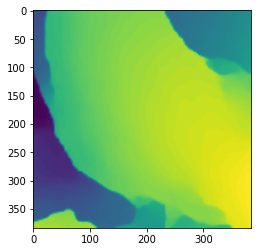

In [40]:
plt.imshow(depth.squeeze())

In [43]:
img.shape

torch.Size([1, 3, 384, 384])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


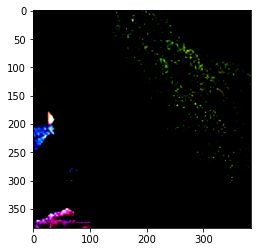

In [41]:
plt.imshow(img.squeeze().cpu().numpy().transpose(1, 2, 0))

In [1]:
import torch

In [27]:
a = torch.ones((64, 960, 3130))

In [21]:
b = torch.ones((64))

In [23]:
b *= torch.tensor(range(64))

In [24]:
a.shape

torch.Size([64, 960, 3130])

In [25]:
b.shape

torch.Size([64])

In [29]:
b

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
        56., 57., 58., 59., 60., 61., 62., 63.])

In [30]:
a *= b.reshape(-1, 1, 1)

In [31]:
a

tensor([[[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]],

        [[ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
         ...,
         [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  ...,  1.,  1.,  1.]],

        [[ 2.,  2.,  2.,  ...,  2.,  2.,  2.],
         [ 2.,  2.,  2.,  ...,  2.,  2.,  2.],
         [ 2.,  2.,  2.,  ...,  2.,  2.,  2.],
         ...,
         [ 2.,  2.,  2.,  ...,  2.,  2.,  2.],
         [ 2.,  2.,  2.,  ...,  2.,  2.,  2.],
         [ 2.,  2.,  2.,  ...,  2.,  2.,  2.]],

        ...,

        [[61., 61., 61.,  ..., 61., 61., 61.],
         [61., 61., 61.,  ..., 61., 61., 61.]

In [7]:
import numpy as np 

In [10]:
a = np.zeros((64, 960, 3130))

In [11]:
b = np.ones((64))

In [13]:
a * b 

ValueError: operands could not be broadcast together with shapes (64,960,3130) (64,) 